## Lending Club Case Study Analysis

### A. Import the required libraries

In [252]:
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data tabulation library
from tabulate import tabulate

# Math functions
import math

# Purpose to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### B. Set-up Global Options

In [253]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [254]:
pd.reset_option('display.max_columns', 0)
pd.reset_option('display.max_rows', 0)

In [255]:
# Read the loan data file from local drive
loan_df = pd.read_csv('loan.csv')

In [256]:
# Check the shape of loan data
loan_df.shape

(39717, 111)

In [257]:
# Check the data-types and null counts of various columns in loan data
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [258]:
# Take a quick look at the values of various columns
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### C. Perform Data Cleaning & Transformation

In [259]:
loan_df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [260]:
# Count the number of null values in each column
null_counts = loan_df.isnull().sum()

# Select the columns where the total number of null values is less than 10000.
# Other columns will be discarded as they don't add value to the analysis due to lack of data
columns_to_keep = null_counts[null_counts < 10000].index

# Store the selected columns in another dataframe
loan1_df = loan_df[columns_to_keep]

In [261]:
# Display the selected columns
columns_to_keep

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [262]:
# Confirm the shape of new dataframe
loan1_df.shape

(39717, 53)

In [263]:
# Look for the columns having missing/ null values in new dataframe
null_counts = loan1_df.isnull().sum()
null_counts[null_counts > 0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

In [264]:
# Handle the missing values for emp_title

# First check for unique values
print(loan1_df.emp_title.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Employer Title")
loan1_df.emp_title.value_counts()

28820

The uniqie column values for Employer Title


emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [265]:
# Based on above distribution, it appears that Employer Titles are fairly random
# There is unlikely to be any correlation between Employer Titles and a person's affinity to default
# Hence all null values can be replaced with a default value of "Employer Name Not Available"

loan1_df.emp_title[loan1_df.emp_title.isnull()] = "Employer Name Not Available"

In [266]:
# Handle the missing values for emp_length

# First check for unique values
print(loan1_df.emp_length.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Employment Length")
loan1_df.emp_length.value_counts()

11

The uniqie column values for Employment Length


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [267]:
# Employment length may have an important bearing on a person's loan default potential
# Since the number of null values is less (2.7%), rather than removing the corresponding rows,
# replace the null values with a default of "Unknown"

loan1_df.emp_length[loan1_df.emp_length.isnull()] = "Unknown"

In [268]:
# Handle the missing values for title

# First check for unique values
print(loan1_df.title.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Loan Title")
loan1_df.title.value_counts()

19615

The uniqie column values for Loan Title


title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [269]:
# There are only 11 Loan Titles with null values. The titles appear to be quite random as well
# Hence replace null Titles with default of "Loan Title Not Provided"

loan1_df.title[loan1_df.title.isnull()] = "Loan Title Not Provided"

In [270]:
# Handle the missing values for revol_util - Revolving Line Utilization Rate

# First check for unique values
print(loan1_df.revol_util.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Revolving Line Utilization Rate")
loan1_df.revol_util.value_counts()

1089

The uniqie column values for Revolving Line Utilization Rate


revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [271]:
# The Revolving Line Utilization Rate is very random. It may have important bearing on loan defaulting potential
# Since the % rows having null Revolving Line Utilization Rate is about 0.1% only, the corresponding rows can be dropped

loan1_df = loan1_df.dropna(subset=['revol_util'])

In [272]:
# Handle the missing values for last_pymnt_d i.e. Last month payment was received

# First check for unique values
print(loan1_df.last_pymnt_d.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Last Month Payment Received")
loan1_df.last_pymnt_d.value_counts()

101

The uniqie column values for Last Month Payment Received


last_pymnt_d
May-16    1256
Mar-13    1024
Dec-14     944
May-13     907
Feb-13     868
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [273]:
# Check the outstanding principal and loan status for rows where last payment received month is null
loan1_df.loc[:,['out_prncp', 'issue_d', 'loan_status', 'term', 'last_pymnt_d', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med']][loan1_df['last_pymnt_d'].isnull()]

,out_prncp,issue_d,loan_status,term,last_pymnt_d,chargeoff_within_12_mths,collections_12_mths_ex_med
26,0.0,Dec-11,Charged Off,36 months,NaN,0.0,0.0
2724,0.0,Nov-11,Charged Off,36 months,NaN,0.0,0.0
3613,0.0,Nov-11,Charged Off,60 months,NaN,0.0,0.0
3985,0.0,Nov-11,Charged Off,60 months,NaN,0.0,0.0
4206,0.0,Nov-11,Charged Off,36 months,NaN,0.0,0.0
...,...,...,...,...,...,...,...
35143,0.0,Sep-09,Charged Off,36 months,NaN,0.0,0.0
35186,0.0,Sep-09,Charged Off,36 months,NaN,0.0,0.0
36185,0.0,Jul-09,Charged Off,36 months,NaN,0.0,0.0
36206,0.0,Jun-09,Charged Off,36 months,NaN,0.0,0.0


In [274]:
# All the respective loans are charged off. Hence these rows are important for analysis of cuatomer's defaulting potential
# None of these loans were charged off in last 12 months
# Charge-off is typically done after 6 months of non-payment
# It can be assumed that the charge-offs had been done much before the loan term completion
# The null values in last payment received month can be approximated by adding terms in months to loan issue month 

In [275]:
loan1_df.loc[:,['issue_d','term', 'last_pymnt_d']][loan1_df['last_pymnt_d'].isnull()]

,issue_d,term,last_pymnt_d
26,Dec-11,36 months,NaN
2724,Nov-11,36 months,NaN
3613,Nov-11,60 months,NaN
3985,Nov-11,60 months,NaN
4206,Nov-11,36 months,NaN
...,...,...,...
35143,Sep-09,36 months,NaN
35186,Sep-09,36 months,NaN
36185,Jul-09,36 months,NaN
36206,Jun-09,36 months,NaN


In [276]:
# Create a temp_term column to extract the term months from term column
loan1_df['temp_term'] = loan1_df['term'].apply(lambda x: int(x[1:3]))

# Convert issue_d to date object and store in temp_date column
loan1_df['temp_date'] = pd.to_datetime(loan1_df['issue_d'], format='%b-%y') 

# Add the term months to temp_date column to arrive at estimated last payment date
loan1_df['temp_date'] = loan1_df.apply(lambda x: x['temp_date'] + pd.DateOffset(months=x['temp_term']), axis=1)

# Convert back the temp_date to "Mmm-yy" format
loan1_df['temp_date'] = loan1_df['temp_date'].dt.strftime('%b-%y')

In [277]:
# Assign the values from temp_date to last_pymnt_d where last_pymnt_d is Null
loan1_df['last_pymnt_d'] = np.where (loan1_df['last_pymnt_d'].isnull(), loan1_df['temp_date'], loan1_df['last_pymnt_d'])

In [278]:
# Now drop the temporary columns
loan1_df.drop('temp_date', axis=1, inplace=True)
loan1_df.drop('temp_term', axis=1, inplace=True)

loan1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39667 non-null  int64  
 1   member_id                   39667 non-null  int64  
 2   loan_amnt                   39667 non-null  int64  
 3   funded_amnt                 39667 non-null  int64  
 4   funded_amnt_inv             39667 non-null  float64
 5   term                        39667 non-null  object 
 6   int_rate                    39667 non-null  object 
 7   installment                 39667 non-null  float64
 8   grade                       39667 non-null  object 
 9   sub_grade                   39667 non-null  object 
 10  emp_title                   39667 non-null  object 
 11  emp_length                  39667 non-null  object 
 12  home_ownership              39667 non-null  object 
 13  annual_inc                  39667 no

In [279]:
# Check if any null value exist in last_pymnt_d column
loan1_df.last_pymnt_d.isnull().sum()

0

In [280]:
# Handle the missing values for last_credit_pull_d

# First check for unique values
print(loan1_df.last_credit_pull_d.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Last Credit Pull Date")
loan1_df.last_credit_pull_d.value_counts()

106

The uniqie column values for Last Credit Pull Date


last_credit_pull_d
May-16    10302
Apr-16     2546
Mar-16     1121
Feb-13      842
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64

In [281]:
# The last_credit_pull_d dates are across various months and years 
# ... and it's not possible to estimate when the credit was last pulled

# Since there are only 2 null values for last_credit_pull_d, let's assume that the last credit was pulled at the time of issuing this loan
# Hence assign the issue_d to last_credit_pull_d for these 2 null values

loan1_df['last_credit_pull_d'] = np.where (loan1_df['last_credit_pull_d'].isnull(), loan1_df['issue_d'], loan1_df['last_credit_pull_d'])

In [282]:
# Handle the missing values for collections_12_mths_ex_med and chargeoff_within_12_mths
# Since both the columns have same number of nulls, check if the same rows have the null values for both

loan1_df.loc[:,['collections_12_mths_ex_med', 'chargeoff_within_12_mths']][loan1_df['collections_12_mths_ex_med'].isnull()].head(57)

,collections_12_mths_ex_med,chargeoff_within_12_mths
39629,NaN,NaN
39642,NaN,NaN
39650,NaN,NaN
39659,NaN,NaN
39660,NaN,NaN
39666,NaN,NaN
39667,NaN,NaN
39668,NaN,NaN
39669,NaN,NaN
39670,NaN,NaN


In [283]:
# Both the columns have null values in same rows. We can treat both the columns in same manner.

# First check for unique values
print(loan1_df.collections_12_mths_ex_med.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Last 12 months collections")
loan1_df.collections_12_mths_ex_med.value_counts()

1

The uniqie column values for Last 12 months collections


collections_12_mths_ex_med
0.0    39611
Name: count, dtype: int64

In [284]:
# Both the columns store onlt zero values. Reconfirm the same through a pivot tab;e
loan1_df.pivot_table(index=['loan_status'], values=['collections_12_mths_ex_med', 'chargeoff_within_12_mths'], aggfunc='sum')

,chargeoff_within_12_mths,collections_12_mths_ex_med
loan_status,,
Charged Off,0.0,0.0
Current,0.0,0.0
Fully Paid,0.0,0.0


In [285]:
# Assign zero values to null rows as well for these two columns
loan1_df['collections_12_mths_ex_med'] = loan1_df.collections_12_mths_ex_med.fillna(0)
loan1_df['chargeoff_within_12_mths'] = loan1_df.chargeoff_within_12_mths.fillna(0)

In [286]:
# Handle the missing values for pub_rec_bankruptcies

# First check for unique values
print(loan1_df.pub_rec_bankruptcies.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Public Record Bankruptcies")
loan1_df.pub_rec_bankruptcies.value_counts()

3

The uniqie column values for Public Record Bankruptcies


pub_rec_bankruptcies
0.0    37290
1.0     1673
2.0        7
Name: count, dtype: int64

In [287]:
# As per the above data, most cases there are zero bankruptcies
# Check if there are Charged-off cases with null-valued pub_rec_bankruptcies

(loan1_df.pivot_table(index=['loan_status'], columns=[ 'pub_rec_bankruptcies'], values='member_id', aggfunc='count', margins=True, dropna=False)).astype(float)

pub_rec_bankruptcies,0.0,1.0,2.0,NaN,All
loan_status,,,,,
Charged Off,5125.0,366.0,2.0,118.0,5611.0
Current,1101.0,37.0,2.0,NaN,1140.0
Fully Paid,31064.0,1270.0,3.0,579.0,32916.0
All,37290.0,1673.0,7.0,NaN,39667.0


In [288]:
# There are about 1.75% cases where pub_rec_bankruptcies is null
# For now, we will assign a number 9 to fill the null values; we will ignore the 9 values for any analysis later

loan1_df.pub_rec_bankruptcies = loan1_df.pub_rec_bankruptcies.fillna(9)

In [289]:
# Handle the missing values for tax_liens

# First check for unique values
print(loan1_df.tax_liens.nunique())

# Also have a look at the unique column values
print("\nThe uniqie column values for Tax Liens")
loan1_df.tax_liens.value_counts()

1

The uniqie column values for Tax Liens


tax_liens
0.0    39628
Name: count, dtype: int64

In [290]:
# All values in tax_liens column are zero
# Hence we would assign zero values to null rows also

loan1_df.tax_liens = loan1_df.tax_liens.fillna(0)

In [291]:
# Check if all missing values have been addressed across all columns
loan1_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

### D. Conduct Exploratory Data Analysis

In [292]:
# Display the columns in latest dataset
columns_to_keep = loan1_df.columns
columns_to_keep

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### D.1. Perform Univariate Analysis

In [293]:
# Categorise variables based on Numeric vs. Categorical types
cat_vars = ["term", "int_rate", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status",
           "issue_d", "loan_status", "purpose", "addr_state", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc",
           "pub_rec", "total_acc", "last_pymnt_d", "last_credit_pull_d", "pub_rec_bankruptcies"]

num_vars = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment", "annual_inc", "dti", "revol_bal", "revol_util", 
            "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", 
            "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt"]

# There are certain variables which are not relevant for the analysis. They may have all zero values. Those are extra_vars.
extra_vars = ["id", "member_id", "emp_title", "pymnt_plan", "url", "title", "zip_code", "initial_list_status", 
              "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", 
              "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"]

# Assign labels for each variable for display on charts
cat_labels = ["Loan Term", "Interest Rate", "Loan Grade", "Loan Subgrade", "Employment Length", "Home Ownership", "Income Verification Status",
           "Loan Issued Month", "Loan Status", "Loan Purpose", "Address State", "30+Days Dues in Past 2 Years", "Earliest Credit Line Openned Month", "No. Inquiries in Last 6 Months", "No. Open Credit Lines",
           "No. Derogatory Public Records", "No. Total Credit Lines", "Last Payment Received Month", "Most Recent Credit Pulled Month", "No. Public Record Bankruptcies"]

num_labels = ["Loan Amount Applied", "Total Loan Amount Funded", "Loan Amount Funded by Investors", "Monthly Installment", "Annual Income of Borrower", "Debt-to-Income Ratio(DTI)", "Total Credit Revolving Balance", "Revolving Line Utilization Rate", 
            "Outstanding Principal", "Outstanding Principal-Investor Funds", "Payment Recd. to Date", "Payment Received-Investor Funds", "Principal Received to Date", "Interest Received to Date", 
            "Late Fees Received to Date", "Post Charge-off Gross Recovery", "Post Charge-off Collection Fee", "Last Payment Amount"]

# Check if the sum of length of three arrays totalling to 53
print("Total variables: " + str(len(cat_vars) + len(num_vars) + len(extra_vars)))

Total variables: 53


In [294]:
# Convert the data type for revol_util from object to float

loan1_df['revol_util'] = loan1_df.revol_util.apply(lambda x: x[:-1]).astype(float)

In [295]:
# Convert the data type for int_rate from object to float

loan1_df['int_rate'] = loan1_df.int_rate.apply(lambda x: x[:-1]).astype(float)

##### D.1.1. Visualize Numerical Variables

In [296]:
# Visualise numerical variables using histplot and boxplot

def visualize_num_variables (num_cols, xaxis_labels, df):
    rows = len(num_cols)
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in num_cols:
        sns.histplot(data=df, x=i, ax=ax[graph_cnt, 0], color=color_dict.get(graph_cnt%5))
        sns.boxplot(data=df, x=i,  ax=ax[graph_cnt, 1], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt, 0].set_title("Frequency Distribution of " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt, 0].set(xlabel=xaxis_labels[graph_cnt])
        ax[graph_cnt, 1].set_title("Summary View for " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt, 1].set(xlabel=xaxis_labels[graph_cnt])
        graph_cnt += 1
    plt.show()

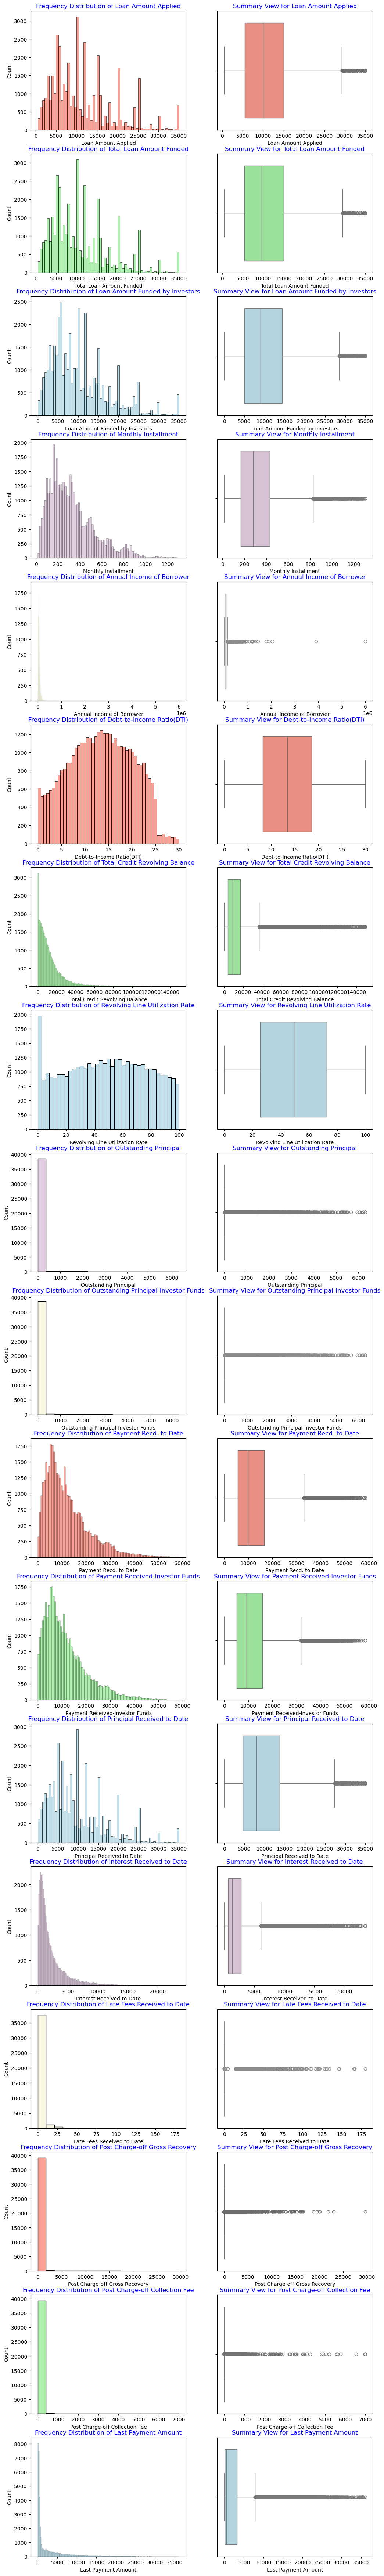

In [297]:
visualize_num_variables(num_vars, num_labels, loan1_df)

In [298]:
# Summary data of mean, standard deviation, minimum, 25-50-75 quartiles and maximum figures for numerical variables

loan1_df[num_vars].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39667.000000,39667.000000,39667.000000,39667.000000,3.966700e+04,39667.000000,39667.000000,39667.000000,39667.00000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000
mean,11227.664053,10955.590919,10405.885280,324.770793,6.899952e+04,13.318704,13398.155394,48.832152,51.29246,51.054040,12163.317191,11577.060419,9801.385736,2265.378544,1.362466,95.190526,12.386794,2681.614472
std,7456.610740,7187.135178,7128.338379,208.882852,6.378947e+04,6.676975,15887.036743,28.332634,375.40481,374.055604,9042.582256,8943.124076,7065.458919,2609.129472,7.292506,689.069773,148.711228,4449.172304
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.080000,4.051632e+04,8.180000,3717.000000,25.400000,0.00000,0.000000,5581.772363,5123.970000,4600.000000,662.820000,0.000000,0.000000,0.000000,219.020000
50%,10000.000000,9625.000000,8975.000000,280.610000,5.900000e+04,13.410000,8863.000000,49.300000,0.00000,0.000000,9918.339299,9294.580000,8000.000000,1350.830000,0.000000,0.000000,0.000000,546.940000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.240000e+04,18.600000,17070.000000,72.400000,0.00000,0.000000,16543.441435,15810.175000,13697.145000,2836.105000,0.000000,0.000000,0.000000,3300.305000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,149588.000000,99.900000,6311.47000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


##### D.1.2. Additional Visualization for Certain Numeric Variables

In [299]:
# Define a function to create histplot and boxplot for a numerical variable

def visualize_single_num_var (data_frame, var_name, colors):
    fix, ax = plt.subplots(1, 2, figsize=(12,4))
    # Create the histplot first
    sns.histplot(data=data_frame, x=var_name, ax=ax[0], color=colors[0])
    ax[0].set(xlabel=num_labels[num_vars.index(var_name)])

    # Next create the boxplot
    sns.boxplot(data=data_frame, x=var_name, ax=ax[1],color=colors[1])
    ax[1].set(xlabel=num_labels[num_vars.index(var_name)])
    plt.show()

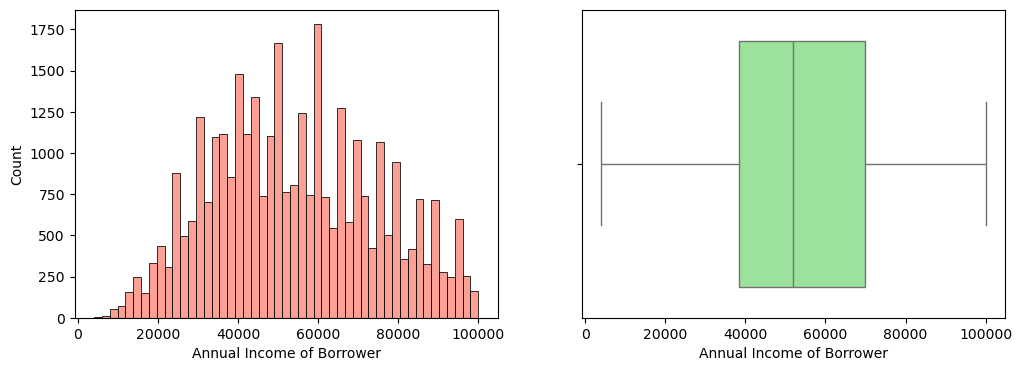

In [300]:
# Additional visualization for Annual Income of Borrower by restricting income upto 100K

visualize_single_num_var (loan1_df.loc[:][loan1_df.annual_inc < 100000], 'annual_inc', ['salmon', 'lightgreen'])

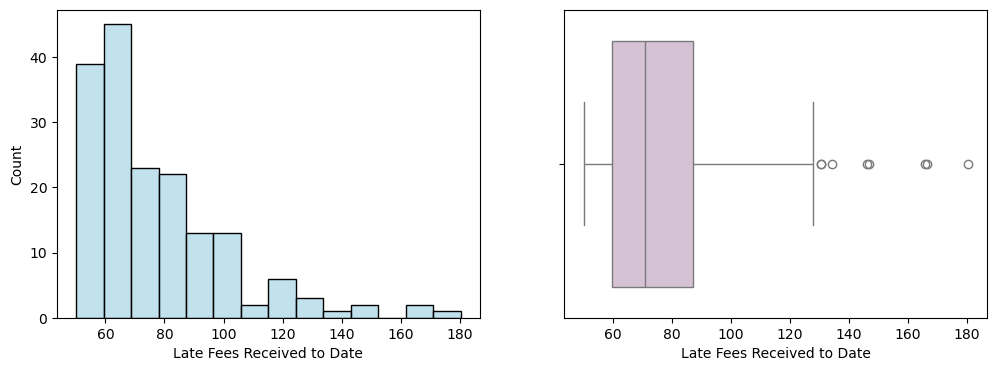

In [301]:
# Additional visualization for Late Payment Received to Date by inspecting values > 50

visualize_single_num_var (loan1_df.loc[:][loan1_df.total_rec_late_fee > 50], 'total_rec_late_fee', ['lightblue', 'thistle'])

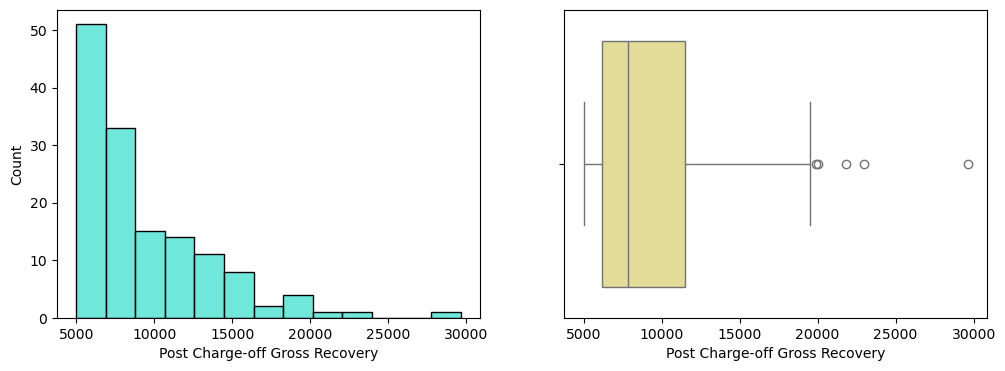

In [302]:
# Additional visualization for Post Charge-off Gross Recovery by inspecting values > 5000 (high recovery)

visualize_single_num_var (loan1_df.loc[:][loan1_df.recoveries > 5000], 'recoveries', ['turquoise', 'khaki'])

In [303]:
# Observations from univariate analysis of numerical variables

# 1. More loan applications seek amounts at rounded figures with $2500 intervals e.g. 5000, 7500, 10000 .... 35000 with median at 10000
# 2. Same trend is seen for Total Loan Amount Funded and Loan Amount Funded by Investors
# 3. Most requirements for individual loans (75 quartile) is for people earning less than 82400
# 4. 3/4th of the borrowers maintain a healthy debt-to-income ratio of less than 19%
# 5. At a mean of 48.8%, the revolving credit utilisation rate is high among borrowers. Same is reflected in quartile distribution.

##### D.1.3. Visualize Categorical Variables

In [304]:
# Visualise categorical variables using histplot and boxplot

def visualize_cat_variables (cat_cols, xaxis_labels, df):
    rows = len(cat_cols)//2 + len(cat_cols) % 2
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*5))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in cat_cols:
        sns.countplot(data=df, x=i, ax=ax[graph_cnt // 2, graph_cnt % 2], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt // 2, graph_cnt % 2].set_title("Frequency Distribution of " + xaxis_labels[graph_cnt], color='blue')
        ax[graph_cnt // 2, graph_cnt % 2].set(xlabel=xaxis_labels[graph_cnt])
        graph_cnt += 1
    plt.show()

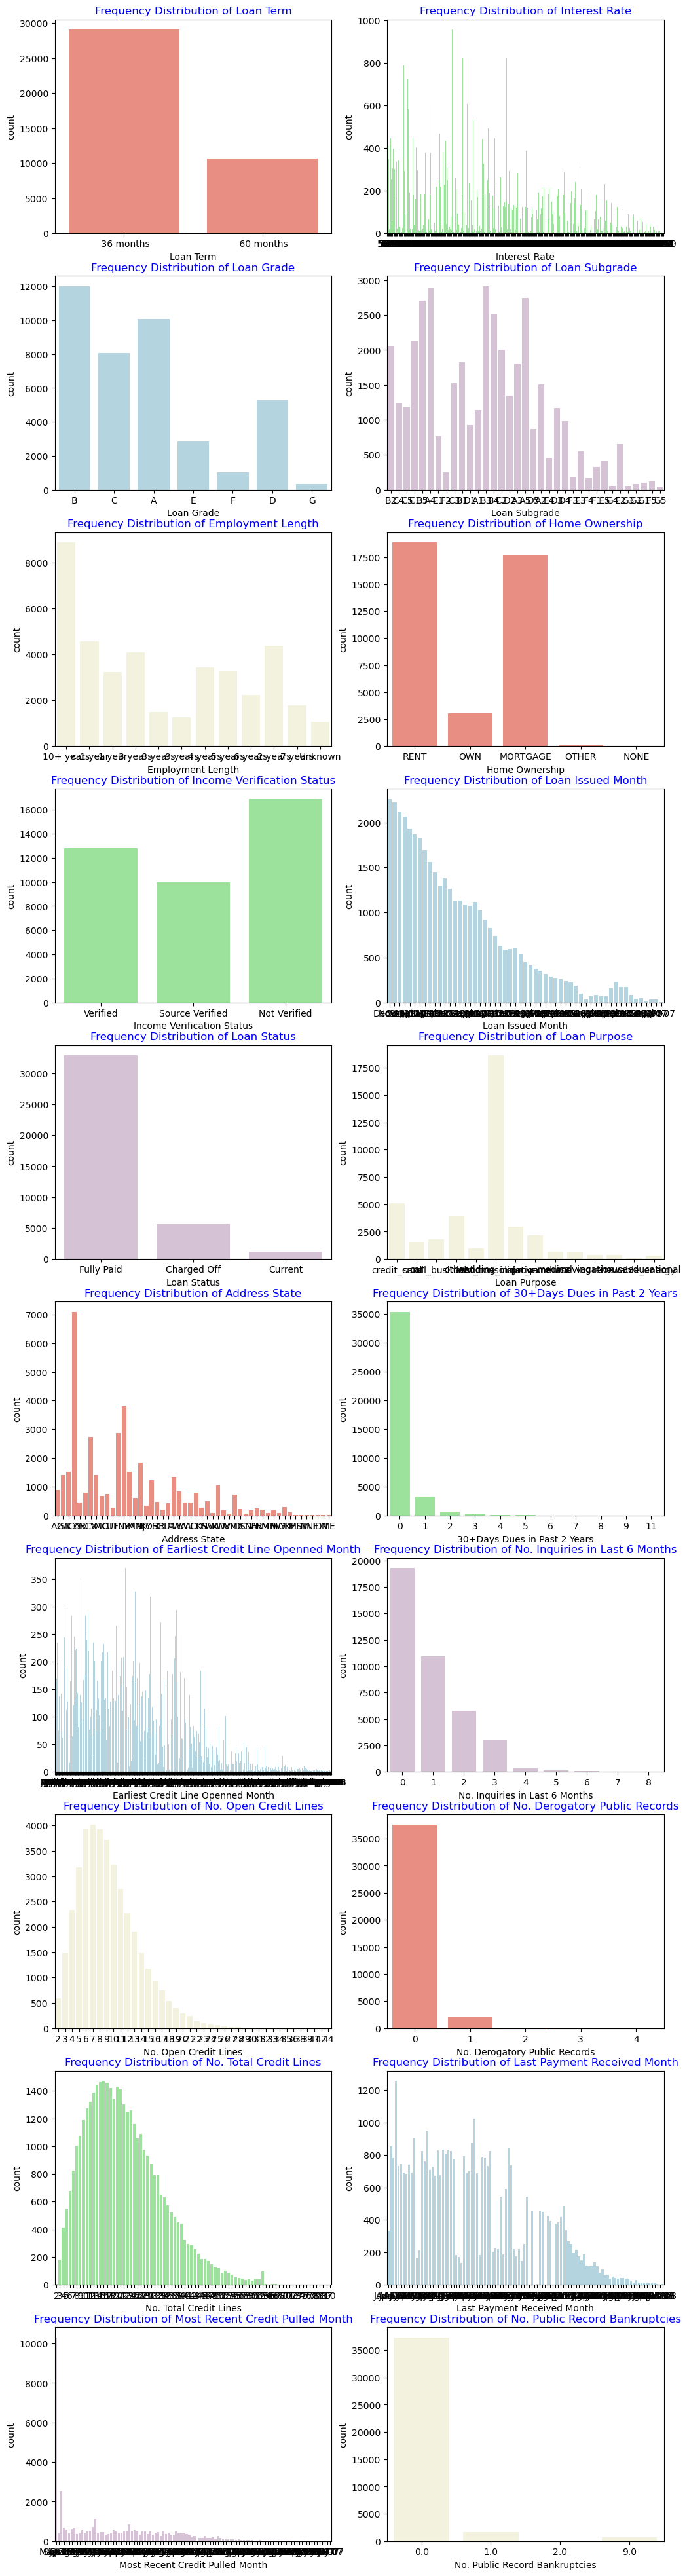

In [305]:
visualize_cat_variables(cat_vars, cat_labels, loan1_df)

In [306]:
# Summary data for Categorical variables with numeric figures

loan1_df[cat_vars].describe(exclude=['O'])

,int_rate,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
count,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000,39667.000000
mean,12.016587,0.146495,0.869211,9.300250,0.055084,22.103411,0.200671
std,3.723856,0.491590,1.070422,4.398866,0.237247,11.398386,1.194120
min,5.420000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,9.250000,0.000000,0.000000,6.000000,0.000000,14.000000,0.000000
50%,11.830000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000
75%,14.540000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000
max,24.590000,11.000000,8.000000,44.000000,4.000000,90.000000,9.000000


In [307]:
# Summary data for Categorical variables with non-numeric figures

loan1_df[cat_vars].describe(include=['O'])

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d
count,39667,39667,39667,39667,39667,39667,39667,39667,39667,39667,39667,39667,39667
unique,2,7,35,12,5,3,55,3,14,50,526,106,106
top,36 months,B,B3,10+ years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,CA,Nov-98,May-16,May-16
freq,29049,12019,2917,8878,18867,16892,2260,32916,18629,7092,370,1256,10302


In [308]:
# Compute percentage of lower grade loans

round(loan1_df['grade'][loan1_df['grade'].isin(['D', 'E', 'F', 'G'])].count()/ loan1_df['grade'].count()*100, 2)

23.9

In [309]:
# Compute home ownerships in percentage distribution

loan1_df['home_ownership'].value_counts(normalize=True)*100

home_ownership
RENT        47.563466
MORTGAGE    44.490382
OWN          7.696574
OTHER        0.242015
NONE         0.007563
Name: proportion, dtype: float64

In [310]:
# Compute income verification status in percentage

loan1_df['verification_status'].value_counts(normalize=True)*100

verification_status
Not Verified       42.584516
Verified           32.266115
Source Verified    25.149368
Name: proportion, dtype: float64

In [311]:
# Compute loan status in percentage

loan1_df['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     82.980815
Charged Off    14.145259
Current         2.873925
Name: proportion, dtype: float64

In [312]:
# Additional data tabularisation for purpose as it is not well visible in above countplot

purpose = pd.pivot_table(loan1_df, index=['purpose'], values=['id'], aggfunc='count')
purpose['% of Total'] = round((purpose['id'] / purpose['id'].sum()) * 100, 2)
print(tabulate(purpose.sort_values(by=['id'], ascending=False), headers=['Purpose', 'Count', '% of Total'], tablefmt="psql"))

+--------------------+---------+--------------+
| Purpose            |   Count |   % of Total |
|--------------------+---------+--------------|
| debt_consolidation |   18629 |        46.96 |
| credit_card        |    5128 |        12.93 |
| other              |    3980 |        10.03 |
| home_improvement   |    2971 |         7.49 |
| major_purchase     |    2181 |         5.5  |
| small_business     |    1827 |         4.61 |
| car                |    1547 |         3.9  |
| wedding            |     946 |         2.38 |
| medical            |     691 |         1.74 |
| moving             |     581 |         1.46 |
| house              |     381 |         0.96 |
| vacation           |     380 |         0.96 |
| educational        |     322 |         0.81 |
| renewable_energy   |     103 |         0.26 |
+--------------------+---------+--------------+


In [313]:
# Additional data tabularisation for state as it is not well visible in above countplot

state = pd.pivot_table(loan1_df, index=['addr_state'], values=['id'], aggfunc='count')
state['% of Total'] = round((state['id'] / state['id'].sum()) * 100, 2)
print(tabulate(state.sort_values(by=['id'], ascending=False), headers=['State', 'Count', '% of Total'], tablefmt="psql"))

+---------+---------+--------------+
| State   |   Count |   % of Total |
|---------+---------+--------------|
| CA      |    7092 |        17.88 |
| NY      |    3811 |         9.61 |
| FL      |    2865 |         7.22 |
| TX      |    2723 |         6.86 |
| NJ      |    1845 |         4.65 |
| IL      |    1524 |         3.84 |
| PA      |    1513 |         3.81 |
| VA      |    1406 |         3.54 |
| GA      |    1398 |         3.52 |
| MA      |    1339 |         3.38 |
| OH      |    1219 |         3.07 |
| MD      |    1047 |         2.64 |
| AZ      |     876 |         2.21 |
| WA      |     839 |         2.12 |
| CO      |     792 |         2    |
| NC      |     787 |         1.98 |
| CT      |     751 |         1.89 |
| MI      |     720 |         1.82 |
| MO      |     685 |         1.73 |
| MN      |     613 |         1.55 |
| NV      |     496 |         1.25 |
| SC      |     472 |         1.19 |
| WI      |     459 |         1.16 |
| AL      |     451 |         1.14 |
|

In [314]:
# Compute number of enquiries in percentage

loan1_df['inq_last_6mths'].value_counts(normalize=True)*100

inq_last_6mths
0    48.602113
1    27.612373
2    14.631810
3     7.676406
4     0.821842
5     0.368064
6     0.161343
7     0.088235
8     0.037815
Name: proportion, dtype: float64

##### D.1.4. Additional Visualization for Certain Categorical Variables

In [315]:
# Define a function to create countplot for a single categorical variable

def visualize_single_cat_var (data_frame, var_name, color):

    plt.figure(figsize=(10, 4))
    sns.countplot(data=data_frame, x=var_name, color=color)
    plt.xlabel(cat_labels[cat_vars.index(var_name)])

    plt.show()

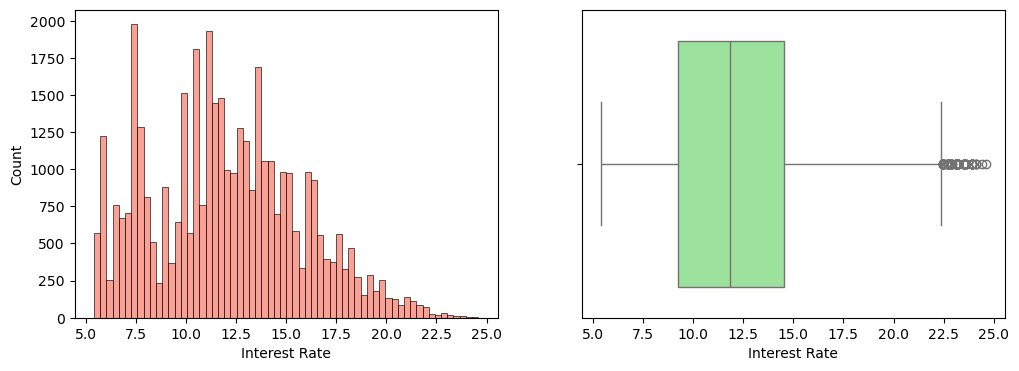

In [316]:
# Additional visualization for Interest Rate by plotting it on histplot & boxplots

fix, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(data=loan1_df, x='int_rate', ax=ax[0], color='salmon')
ax[0].set(xlabel=cat_labels[cat_vars.index('int_rate')])

sns.boxplot(data=loan1_df, x='int_rate', ax=ax[1], color='lightgreen')
ax[1].set(xlabel=cat_labels[cat_vars.index('int_rate')])

plt.show()

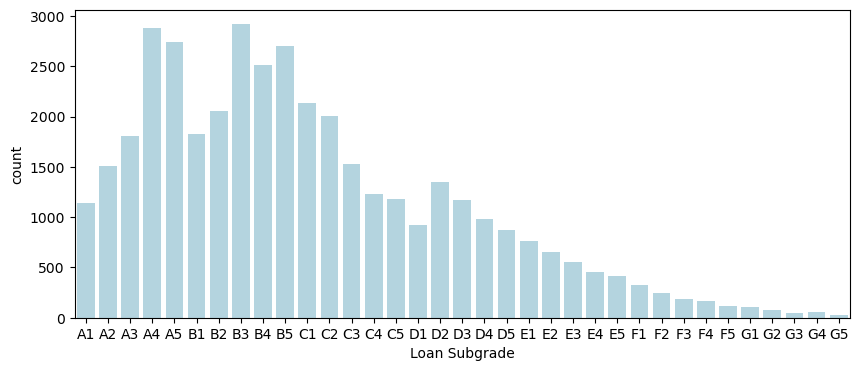

In [317]:
# Additional data visualization for sub_grade as these are not well visible in above countplot

# loan1_df[['grade', 'sub_grade']].groupby(by=['grade', 'sub_grade'])['sub_grade'].count()

visualize_single_cat_var(loan1_df.sort_values(by=['sub_grade']), 'sub_grade', 'lightblue')

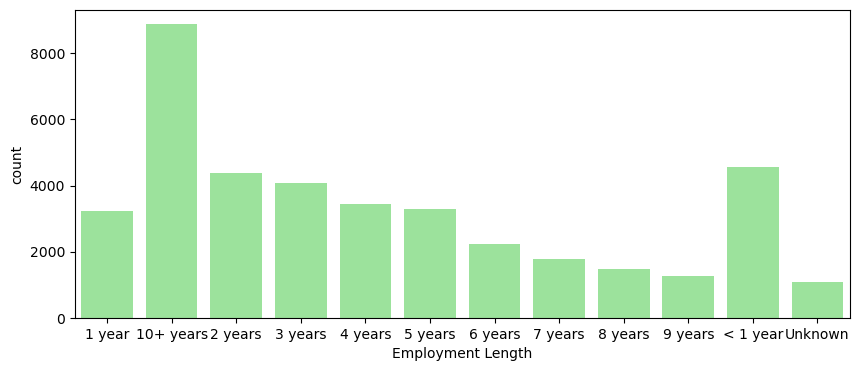

In [318]:
# Additional data visualization for emp_length as these are not well visible in above countplot

visualize_single_cat_var(loan1_df.sort_values(by=['emp_length']), 'emp_length', 'lightgreen')

In [319]:
# Compute percentage of borrowers having 1 year or less job experience

round(loan1_df['emp_length'][loan1_df['emp_length'].isin(['< 1 year', '1 year'])].count()/ loan1_df['emp_length'].count()*100, 2)

19.68

In [320]:
# Observations from univariate analysis of categorical variables

# 1. 1/4th of borrowers (above 75-quartile) take loan at high interest of 14.5%
# 2. There is a significant proportion (23.9%) lower grade loans (Grade D and lower) offered in market
# 3. A high percentage (20%) of borrowers with 1 or less year job experience take loans
# 4. A low percentage (7.7%) of borrowers have their own home which are not mortgaged
# 5. Only a third (32%) of loans get income verified.
# 6. Bulk of the loans (60%) is taken for Debt Consolidation and Credit Card Payment
# 7. 14% of the loans get charged off by financial providers
# 8. Highest % of borrowers (18%) come from California (CA) state
# 9. About 24% borrowers get 2 or more enquiries in the last six months
# 10. 50% borrowers (median) has 9 or more open credit lines

#### D.2. Perform Bivariate Analysis

##### D2.1. Identify target variables

In [321]:
# The objective of the Case Study is to identify factors which influence defaulting potential of a borrower
# Hence we need to identify those variables first (target variables) which indicate defaulted borrowers
# Subsequently we need to analyse relationship of other variables with these target variables

In [322]:
# Target variables are those which determine defaulted borrowers
# We would exclude those variables which have all null or all zero values
# Our primary target variable is loan_status within which all those whose loans are Charged-Off are defaulted borrowers

target_var = 'loan_status'

# There could be a few other variables which reflect bad payment history of borrowers which may act as secondary target variables
target_num_vars = ["collection_recovery_fee", "recoveries"]

target_cat_vars = ["delinq_2yrs", "pub_rec", "pub_rec_bankruptcies"]

In [323]:
# ----------------------------------------------------------------------------------------------------------------------------
# For all of the bivariate analysis, Current Loan data have been removed as it's not known whether those loans would default.
# This would enable better and clearer comparison between defaulting (Charged Off) and non-defaulting (Fully Paid) loans
# ----------------------------------------------------------------------------------------------------------------------------
past_ln_df = loan1_df[loan1_df.loan_status != 'Current']

In [324]:
# Handling of outlier data points in Bivariate analysis
# In general, the outliers have not been removed from dataset. This is because,
# 1) There is no evidence that those are not valid data
# 2) The extreme data points are important to analyse to understand if they have any impact on loan default
# 3) Removing outliers may make the boxplots look similar for Charged Off and Fully Paid loan groups, thus making the analysis ineffective

##### D.2.2. Visualize Relationship between Loan Status and Numeric Variables

In [325]:
# Define a function to visualize influence of numeric variables on target variable
def bva_num_tgt_vars (df, num_cols, yaxis_labels, target_var, xaxis_label):
    rows = len(num_cols)//2 + len(num_cols) % 2
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*6))
    # color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in num_cols:
        # sns.boxplot(data=df, x=target_var, y=i, ax=ax[graph_cnt // 2, graph_cnt % 2], color=color_dict.get(graph_cnt%5))
        axis = ax[graph_cnt // 2, graph_cnt % 2]
        sns.boxplot(data=df, x=target_var, y=i, ax=axis, palette=['tab:green','tab:orange'])

        # Adding title, tick and axes labels
        # ax[graph_cnt // 2, graph_cnt % 2].set(xlabel=xaxis_label, ylabel=yaxis_labels[graph_cnt])
        axis.set_title(xaxis_label + " vs. " + yaxis_labels[graph_cnt], size = 14, color='blue')
        axis.tick_params(labelsize = 10, labelrotation = 0)
        axis.set_xlabel(xaxis_label, size = 12, color='brown')
        axis.set_ylabel(yaxis_labels[graph_cnt], size = 12, color='brown')
        
        graph_cnt += 1
    plt.show()

In [326]:
# Define a function to create boxplot between target and a single numeric variable after removing outliers
def bva_nofliers_num_var (df, y_var, yaxis_label, x_var, xaxis_label):

    fix, ax = plt.subplots(figsize=(8,4))

    Q1 = df[y_var].quantile(0.25)
    Q3 = df[y_var].quantile(0.75)
    IQR = Q3 - Q1 
    
    filter = (df[y_var] >= Q1 - 1.5 * IQR) & (df[y_var] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]
    
    sns.boxplot(data=df, x=x_var, y=y_var, ax=ax, palette=['tab:green','tab:orange'])

    # Adding title, tick and axes labels
    ax.set_title(xaxis_label + " vs. " + yaxis_label, size = 14, color='blue')
    ax.tick_params(labelsize = 10, labelrotation = 0)
    ax.set_xlabel(xaxis_label, size = 12, color='brown')
    ax.set_ylabel(yaxis_label, size = 12, color='brown')
    
    plt.show()

In [327]:
# Define a function to pick specific colors for certain graphs
def gen_colors(df):
    col_lst = {'Charged Off': 'tab:orange', 'Current': 'tab:blue', 'Fully Paid': 'tab:green'}
    return [col_lst[col] for col in df.columns if col in ['Charged Off', 'Current', 'Fully Paid']]

In [328]:
# Define a function to visualize influence of categorical variables on target variable
# The method below draws bar graph with only 100% stacked bars

def bva_sngl_cat_tgt_vars (df, y_var, yaxis_label, x_var, xaxis_label):
    
    fig, ax = plt.subplots(figsize=(12, 4))

    graph_df = (df
              .groupby([x_var])[y_var]
              .value_counts(normalize=True)
              # .sort_index(ascending=False)
              .mul(100)
              .round(0)
              .unstack())

    # colours = {"Charged Off": "Orange", "Current": "Blue", "Fully Paid": "Green"}
    # colors = ['tab:orange', 'tab:green', 'tab:blue']
    
    graph_df.plot(kind = "bar",
                    stacked = True,
                    ax = ax,
                    legend = True,
                    # width = 0.5,
                    color=gen_colors(graph_df),
                    edgecolor = "black")
    
    # Add graph title
    ax.set_title(xaxis_label + " vs. " + yaxis_label[0], size = 14, color='blue')
    
    # Adding bar labels - Removed the bar levels as it may make the graph look clumsy
    # for c in ax.containers:
    #         labels = [str(round(v.get_height(), 0)) + "%" if v.get_height() > 0 else '' for v in c]
    #         ax.bar_label(c,
    #                  label_type='center',
    #                  labels = labels,
    #                  size = 10) # add a container object "c" as first argument
    
    # Removing spines
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)
        
    # Adding tick and axes labels
    ax.tick_params(labelsize = 10, labelrotation = 0)
    ax.set_ylabel(yaxis_label[0], size = 12, color='brown')
    ax.set_xlabel(xaxis_label, size = 12, color='brown')
    
    # Add legend for the right-side graph
    ax.legend(#labels = ["no", "yes"],
          fontsize = 10,
          title = 'Loan Status',
          title_fontsize = 10,
          bbox_to_anchor = [1, 1]
    )
    
    # plt.show()
    return fig, ax

In [329]:
# Define a function to visualize influence of numerical variables on numeric target variable
# The method below draws scatter plot

def bva_num_num_vars (df, num_cols, xaxis_labels, target_var):
    rows = len(num_cols)//2 + len(num_cols) % 2
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*4))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in num_cols:
        sns.scatterplot(data=df, x=i, y=target_var, ax=ax[graph_cnt // 2, graph_cnt % 2], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt // 2, graph_cnt % 2].set(xlabel=xaxis_labels[graph_cnt], ylabel=xaxis_labels[num_cols.index(target_var)])
        graph_cnt += 1
    plt.show()

In [330]:
# Define a function to visualize influence of categorical variables on numeric target variable
# The method below draws box plot

def bva_num_cat_vars (df, cat_cols, xaxis_labels, target_var, yaxis_label):
    rows = len(cat_cols)//2 + len(cat_cols) % 2
    fix, ax = plt.subplots(rows, 2, figsize=(12,rows*4))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in cat_cols:
        sns.boxplot(data=df, x=i, y=target_var, ax=ax[graph_cnt // 2, graph_cnt % 2], color=color_dict.get(graph_cnt%5))
        ax[graph_cnt // 2, graph_cnt % 2].set(xlabel=xaxis_labels[graph_cnt], ylabel=yaxis_label)
        graph_cnt += 1
    plt.show()

In [331]:
# Define a function that can divide the values of a numeric variable into multiple bins

def create_bins (df, source_var, target_var, bins_cnt):
    min_val = math.floor(df[source_var].min())
    max_val = math.ceil(df[source_var].max())
    bin_width = ( max_val - min_val)/bins_cnt
    
    # Create the bins
    ranges = []
    for i in range(bins_cnt+1):
        ranges.append(int(min_val + i * bin_width))
    df[target_var] = pd.cut(df[source_var], ranges)
    return df

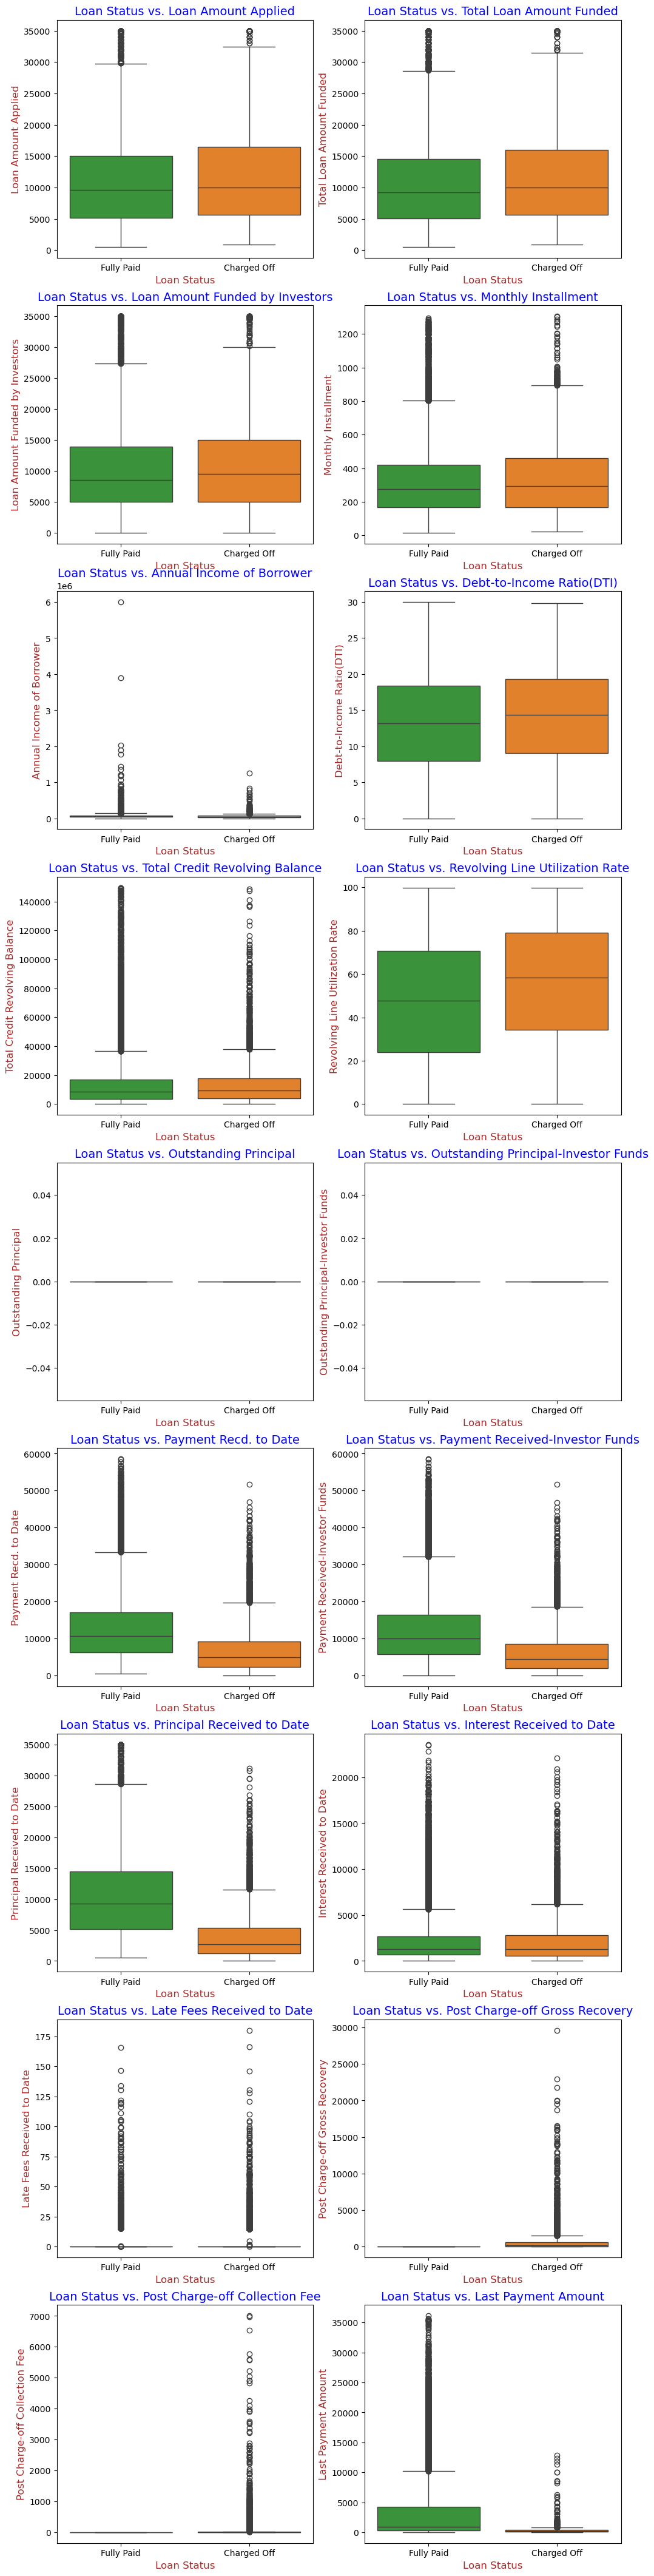

In [332]:
# Create the graphs with x-axis as target variable (loan_status) and y-axis as nummerical variables
bva_num_tgt_vars (past_ln_df, num_vars, num_labels, 'loan_status', 'Loan Status')

In [333]:
# Observations from graphs between loan_status and numeric variables

# Loan Amount Applied, Total Loan Amount Funded, Loan Amount Funded by Investors: 
    # There is no significant variations in quartile numbers between Charged Off and Fully Paid loans. 
    # Hence these are not driving factors

# Monthly Installment, Annual Income of Borrower: Please refer below

# Debt-to-Income Ratio(DTI):
    # The Charged Off loans have only slightly higher DTI ratio than Fully Paid loans
    # Hence this is not a driving factor

# Total Credit Revolving Balance: Please refer below

# Revolving Line Utilization Rate:
    # All the quartile values are 8-10% higher in case of Charged Off loans
    # Hence this is a driving factor

# Outstanding Principal, Outstanding Principal for Investor Funds: 
    # Both have all zero values, hence not considered as driving factors

# Payment Recd. to Date, Payment Recd. to Date for Investor Funds, Principal Received to Date, 
# Interest Received to Date, Late Fees Received to Date:
    # For all Fully Paid loans, entire Loan Principal and Interest have been received
    # For Charged Off loans, part of Loan Principal and Interest have NOT been received
    # Accordingly the graphs indicate lower quartile values for these variables
    # These are post-facto (lag) indicators and can't be considered to determine defaulting potential of borrowers

# Post Charge-off Gross Recovery, Post Charge-off Collection Fee:
    # These figures are applicable for Charged Off loans only
    # These are post-facto (lag) indicators and can't be considered to determine defaulting potential of borrowers

# Last Payment Amount:
    # This data doesn't have any relevance to determining defaulting potential of borrowers

In [334]:
# num_vars = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment", "annual_inc", "dti", "revol_bal", "revol_util", 
#            "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", 
#            "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_amnt"]

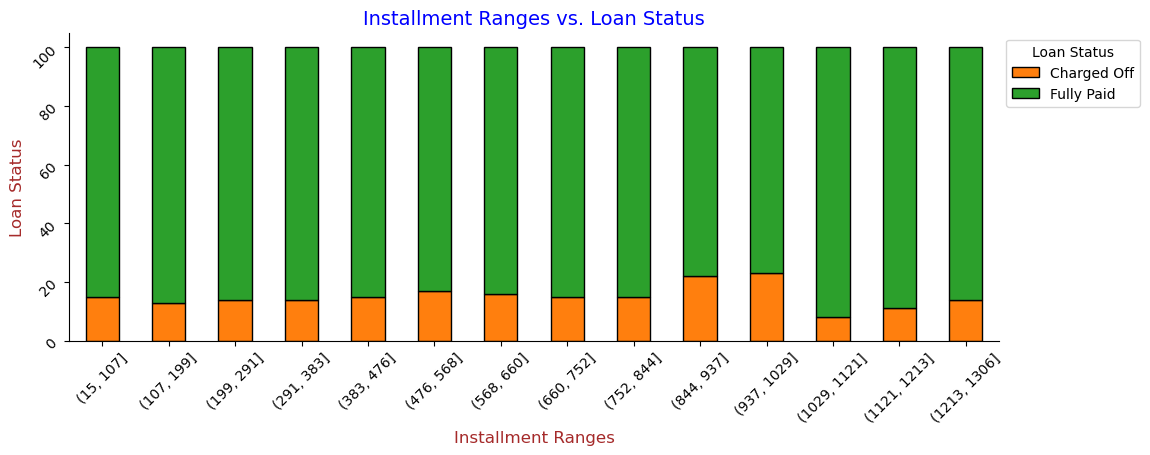

In [335]:
# Draw the loan_status vs. installment chart differently by diving installment into 14 bins

past_ln_df = create_bins(past_ln_df, 'installment', 'install_range', 14)

# Draw the graph
fig, ax = bva_sngl_cat_tgt_vars (past_ln_df, ['loan_status'], ['Loan Status'], 'install_range', 'Installment Ranges')
ax.tick_params(labelrotation = 45)
fig.show()

# Observations:
# There is no significant variation in Charged Off percentages with different installment ranges
# Similar views are reflected from above boxplots also
# Hence Monthly Installment is not a driving factor

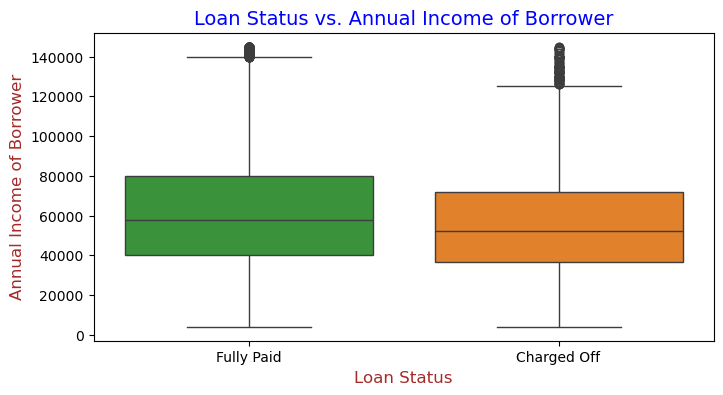

In [336]:
# Redraw the loan_status vs. annual_inc graph after removing outliers

bva_nofliers_num_var (past_ln_df, 'annual_inc', num_labels[num_vars.index('annual_inc')], 'loan_status', 'Loan Status')

# Observations:
# The charged off loans have slightly lower 75% quartile and max values.
# But the differences are not significant to call out annual income as driving factor

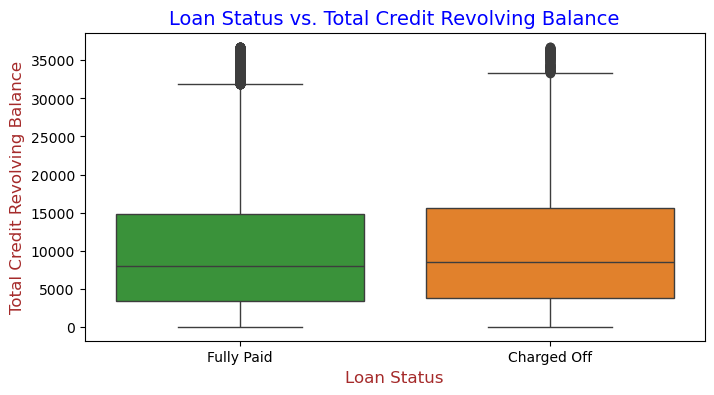

In [337]:
# Redraw the loan_status vs. revol_bal graph after removing outliers since the whisker is tall for the raw boxplot

bva_nofliers_num_var (past_ln_df, 'revol_bal', num_labels[num_vars.index('revol_bal')], 'loan_status', 'Loan Status')

# Observations:
# The charged off loans have similar quartile and max values as that of Fully Paid loans
# Hence this is not a driving factor

In [338]:
loan1_df[["loan_status", "loan_amnt", "funded_amnt", "funded_amnt_inv", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", 
            "total_rec_late_fee", "recoveries", "collection_recovery_fee"]].loc[(loan1_df['loan_status'] == 'Charged Off') & (loan1_df['recoveries'] != 0)]


# loan1_df['total_rec_late_fee']+loan1_df['recoveries']+loan1_df['collection_recovery_fee']) & (loan1_df['loan_status'] == 'Charged Off')

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
1,Charged Off,2500,2500,2500.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.080000,1.1100
8,Charged Off,5600,5600,5600.0,0.0,0.0,646.020000,646.02,162.02,294.94,0.00,189.060000,2.0900
9,Charged Off,5375,5375,5350.0,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.00,269.290000,2.5200
12,Charged Off,9000,9000,9000.0,0.0,0.0,2270.700000,2270.70,1256.14,570.26,0.00,444.300000,4.1600
14,Charged Off,10000,10000,10000.0,0.0,0.0,7471.990000,7471.99,5433.47,1393.42,0.00,645.100000,6.3145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,Charged Off,8000,8000,150.0,0.0,0.0,7294.650000,136.40,5717.45,1474.29,0.00,102.910000,1.0400
39640,Charged Off,2125,2125,550.0,0.0,0.0,2580.248838,666.85,943.58,382.27,0.00,1254.398838,444.2500
39666,Charged Off,15450,15450,600.0,0.0,0.0,11652.750000,451.73,8688.59,2659.96,0.00,304.200000,3.0900
39667,Charged Off,2500,2500,675.0,0.0,0.0,2220.610000,599.28,1706.01,477.21,1.69,35.700000,0.3800


In [339]:
past_ln_df[num_vars].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,38527.000000,38527.000000,38527.000000,38527.000000,3.852700e+04,38527.000000,38527.000000,38527.000000,38527.0,38527.0,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11055.265139,10791.956939,10230.940095,322.678650,6.880923e+04,13.276353,13305.458795,48.702777,0.0,0.0,11876.606662,11281.016641,9656.409417,2120.822073,1.368076,98.007179,12.753315,2749.201526
std,7348.433587,7090.256225,7022.678989,208.649278,6.421493e+04,6.671392,15868.644361,28.364741,0.0,0.0,8810.442949,8701.345967,7009.411791,2390.447503,7.318506,698.992937,150.879911,4496.740039
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5325.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.140000,3667.000000,25.200000,0.0,0.0,5519.447680,5031.275000,4500.000000,644.825000,0.000000,0.000000,0.000000,217.775000
50%,9600.000000,9600.000000,8750.000000,278.150000,5.900000e+04,13.370000,8777.000000,49.100000,0.0,0.0,9685.515720,9076.500000,8000.000000,1301.350000,0.000000,0.000000,0.000000,569.030000
75%,15000.000000,15000.000000,14000.000000,425.860000,8.200000e+04,18.560000,16930.000000,72.300000,0.0,0.0,16147.246055,15341.180000,13200.000000,2672.940000,0.000000,0.000000,0.000000,3451.365000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,149588.000000,99.900000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


##### D.2.3. Visualize Relationship between Loan Status and Categorical Variables

In [340]:
# Define a function to visualize influence of categorical variables on target variable
# For the same Categorical Variable, draw two graphs - one with absolute stacked bars and other with 100% stacked bar

def bva_cat_tgt_vars (df, cat_cols, yaxis_labels, target_var, xaxis_label):
    rows = len(cat_cols)
    fig, axes = plt.subplots(rows, 2, figsize=(12,rows*4))
    color_dict = {0:'salmon', 1:'lightgreen', 2:'lightblue', 3:'thistle', 4:'beige'}
    graph_cnt = 0
    for i in cat_cols:
        for side in ['Left', 'Right']:
            graph_df = (df
              .groupby([target_var])[i]
              .value_counts(normalize=True if side == 'Left' else False)
              # .sort_index(ascending=False)
              .mul(100 if side == 'Left' else 1)
              .round(0)
              .unstack())
    
            # Plot the graph
            
            # Identify the axis for subplot
            if rows == 1:
                ax = axes[0] if side == 'Left' else axes[1]
            else:
                ax = axes[graph_cnt][0] if side == 'Left' else axes[graph_cnt][1]

            graph_df.plot(kind = "bar",
                stacked = True if side == 'Left' else False,
                ax = ax,
                legend = True if side == 'Right' else False,
                edgecolor = "black")
            
            # Add graph title
            ax.set_title(xaxis_label + " vs. " + yaxis_labels[graph_cnt], size = 14, color='blue')
            
            # Adding bar labels for stacked barplot
            for c in ax.containers:
                if side == 'Left':
                    labels = [str(round(v.get_height(), 0)) + "%" if v.get_height() > 0 else '' for v in c]
                else:
                    labels = [str(int(v.get_height())) if v.get_height() > 0 else '' for v in c]
                if side == 'Left':
                    ax.bar_label(c,
                             label_type='center',
                             labels = labels,
                             size = 10) # add a container object "c" as first argument
            # Removing spines
            for s in ["top", "right"]:
                ax.spines[s].set_visible(False)
                
            # Adding tick and axes labels
            ax.tick_params(labelsize = 10, labelrotation = 0)
            ax.set_ylabel(yaxis_labels[graph_cnt], size = 12, color='brown')
            ax.set_xlabel(xaxis_label, size = 12, color='brown')
            
            # Add legend for the right-side graph
            if side == 'Right':
                ax.legend(#labels = ["no", "yes"],
                      fontsize = 10,
                      title = yaxis_labels[graph_cnt],
                      title_fontsize = 10,
                      bbox_to_anchor = [1, 1]
                )
        graph_cnt += 1
    plt.show()

In [341]:
# Create the graphs with x-axis as target variable (loan_status) and y-axis as categorical variables

# cat_vars = ["term", "int_rate", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status",
#           "issue_d", "loan_status", "purpose", "addr_state", "delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc",
#           "pub_rec", "total_acc", "last_pymnt_d", "last_credit_pull_d", "pub_rec_bankruptcies"]

# cat_labels = ["Loan Term", "Interest Rate", "Loan Grade", "Loan Subgrade", "Employment Length", "Home Ownership", "Income Verification Status",
#           "Loan Issued Month", "Loan Status", "Loan Purpose", "Address State", "30+Days Dues in Past 2 Years", "Earliest Credit Line Openned Month", "No. Inquiries in Last 6 Months", "No. Open Credit Lines",
#           "No. Derogatory Public Records", "No. Total Credit Lines", "Last Payment Received Month", "Most Recent Credit Pulled Month", "No. Public Record Bankruptcies"]


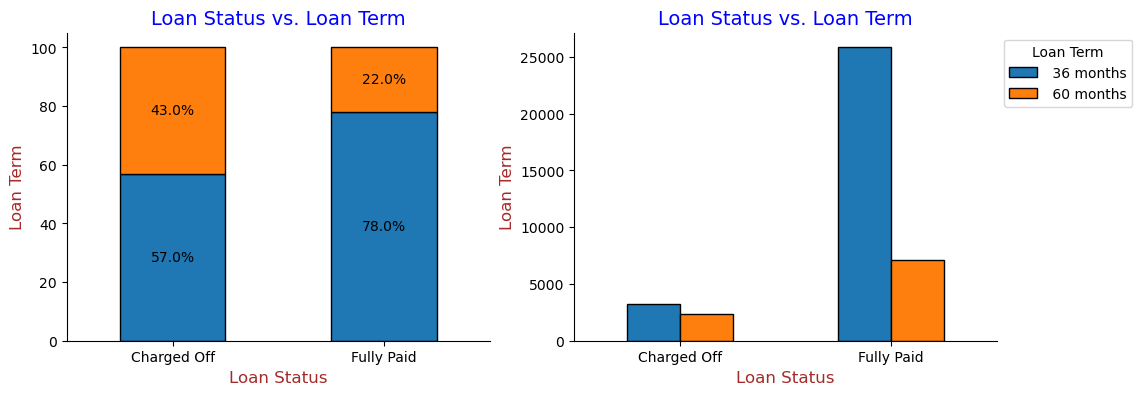

In [342]:
# Create graph between int_rate and loan_status
bva_cat_tgt_vars(past_ln_df, ['term'], ['Loan Term'], 'loan_status', 'Loan Status')

# Observations:
# Longer term loans (60 months) have higher propensity for default. 
# There is a percentage points difference of 21% between Charged-off and Fully Paid 60-Months loans

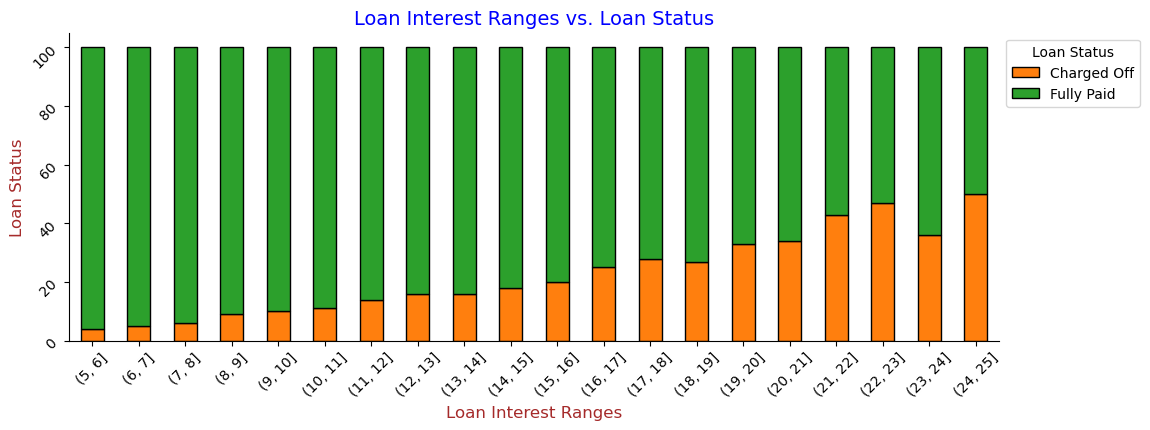

In [343]:
# Draw the int_rate chart differently by diving int rates into 20 bins

past_ln_df = create_bins(past_ln_df, 'int_rate', 'int_range', 20)

# Draw the graph
fig, ax = bva_sngl_cat_tgt_vars (past_ln_df, ['loan_status'], ['Loan Status'], 'int_range', 'Loan Interest Ranges')
ax.tick_params(labelrotation = 45)
fig.show()

# Observations:
# Higher interest rates have higher percentage of defaults

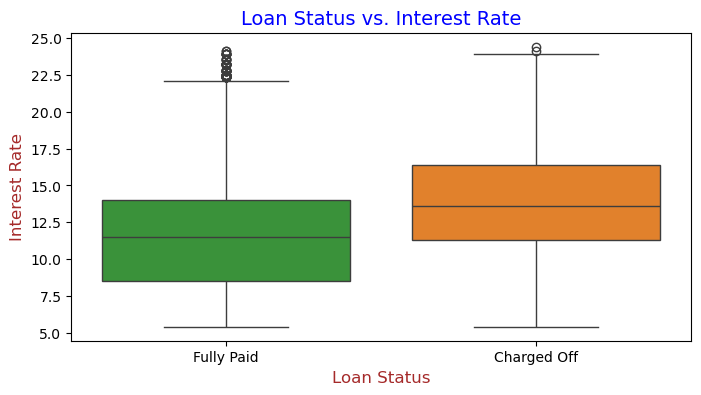

In [344]:
# Additional visualization for Interest Rate by plotting it on boxplots

fix, ax = plt.subplots(figsize=(8,4))

sns.boxplot(data=past_ln_df, x='loan_status', y='int_rate', ax=ax, palette=['tab:green','tab:orange'])
ax.set_title(cat_labels[cat_vars.index('loan_status')] + " vs. " + cat_labels[cat_vars.index('int_rate')], size=14, color='blue')
ax.tick_params(labelsize = 10, labelrotation = 0)
ax.set_xlabel(cat_labels[cat_vars.index('loan_status')], size = 12, color='brown')
ax.set_ylabel(cat_labels[cat_vars.index('int_rate')], size = 12, color='brown')

plt.show()

# Observations:
# All the quartiles of Charged-off loans are higher than that of Fully Paid loans
# Hence loading higher interest rates clearly increases the potential for defaults

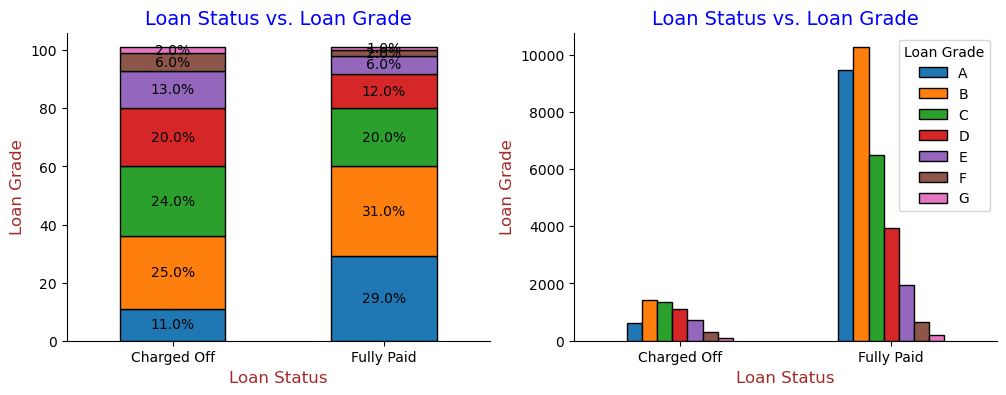

In [345]:
# Create graph between grade and loan_status
bva_cat_tgt_vars(past_ln_df, ['grade'], ['Loan Grade'], 'loan_status', 'Loan Status')

# Observations:
# Lower Loan Grades (C and below) have more percentage of defaulters

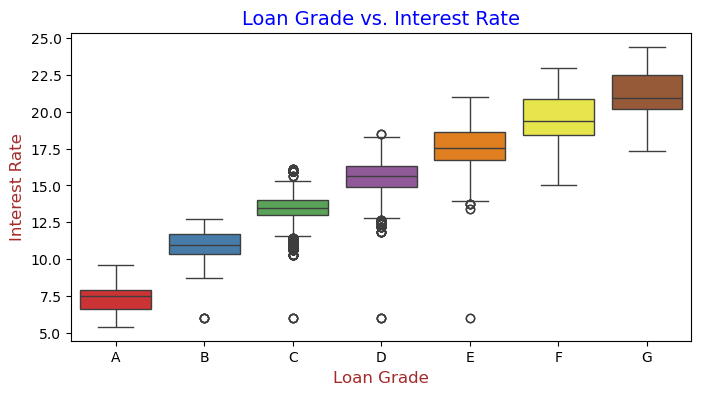

In [346]:
# Additional visualization for Interest Rate vs. Loan Grade by plotting them on boxplots

fix, ax = plt.subplots(figsize=(8,4))

sns.boxplot(data=past_ln_df.sort_values('grade'), x='grade', y='int_rate', ax=ax, palette='Set1')
ax.set_title(cat_labels[cat_vars.index('grade')] + " vs. " + cat_labels[cat_vars.index('int_rate')], size=14, color='blue')
ax.tick_params(labelsize = 10, labelrotation = 0)
ax.set_xlabel(cat_labels[cat_vars.index('grade')], size = 12, color='brown')
ax.set_ylabel(cat_labels[cat_vars.index('int_rate')], size = 12, color='brown')

plt.show()

# Observations:
# Lower Loan Grades are slapped with higher interest rates, this inturn lead to higher number of defaults

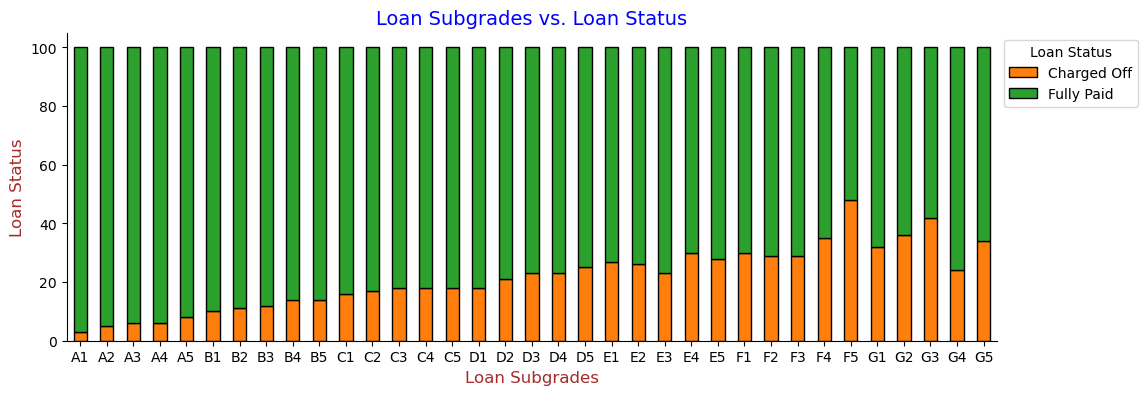

In [347]:
# Draw the sub_grade chart differently in one long horizontal chart
fig, ax = bva_sngl_cat_tgt_vars (past_ln_df, ['loan_status'], ['Loan Status'], 'sub_grade', 'Loan Subgrades')
fig.show()

# Observations:
# Within a Loan Grade, there is no significant difference among Subgrades towards loan defulting contributions except in G grade

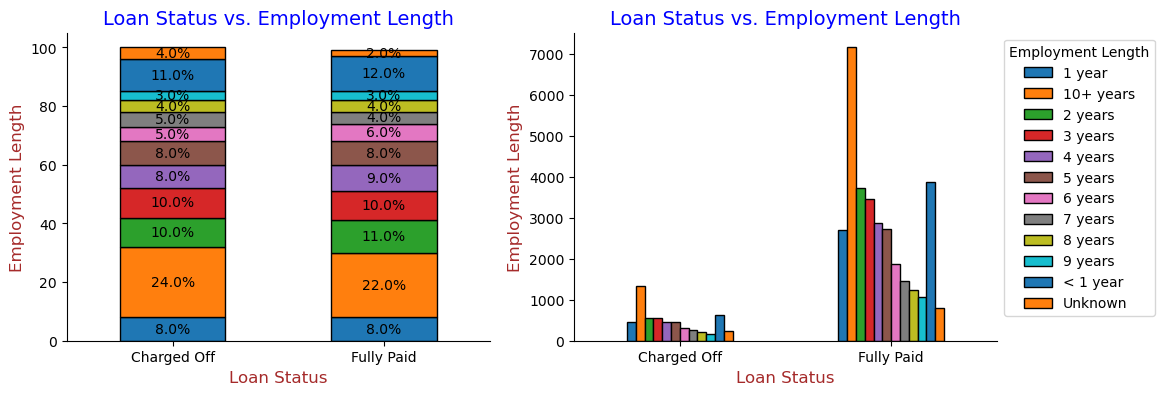

In [348]:
# Create graph between emp_length and loan_status
bva_cat_tgt_vars(past_ln_df, ['emp_length'], ['Employment Length'], 'loan_status', 'Loan Status')

# Observations:
# Employment Length doesn't influence loan Charge-off potential as there is no significant difference between % contributions
# of Employment Lengths towards charge-offs or full payment of loans

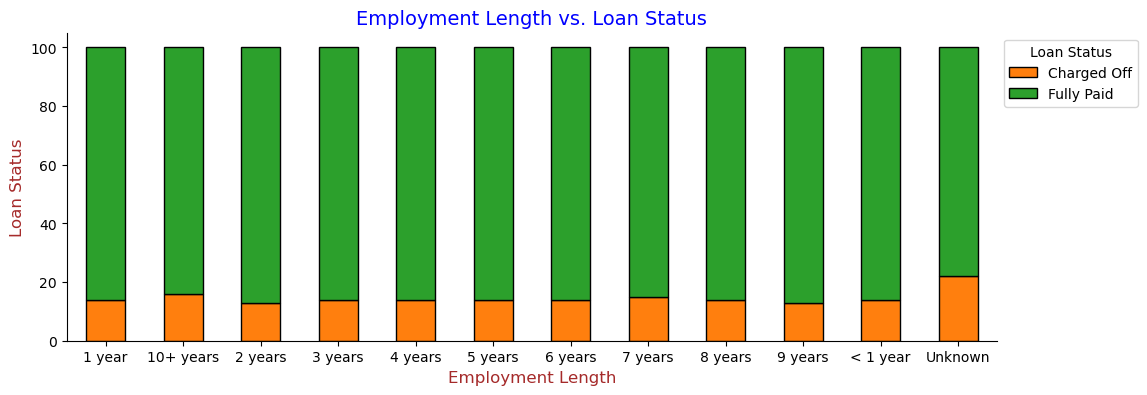

In [349]:
# Redo the graph between emp_length and loan_status by swapping axis
fig, ax = bva_sngl_cat_tgt_vars(past_ln_df, ['loan_status'], ['Loan Status'], 'emp_length', 'Employment Length')
fig.show()

# Observations:
# Percentage contributions of Employment Length on loan defaults remains same across difference periods

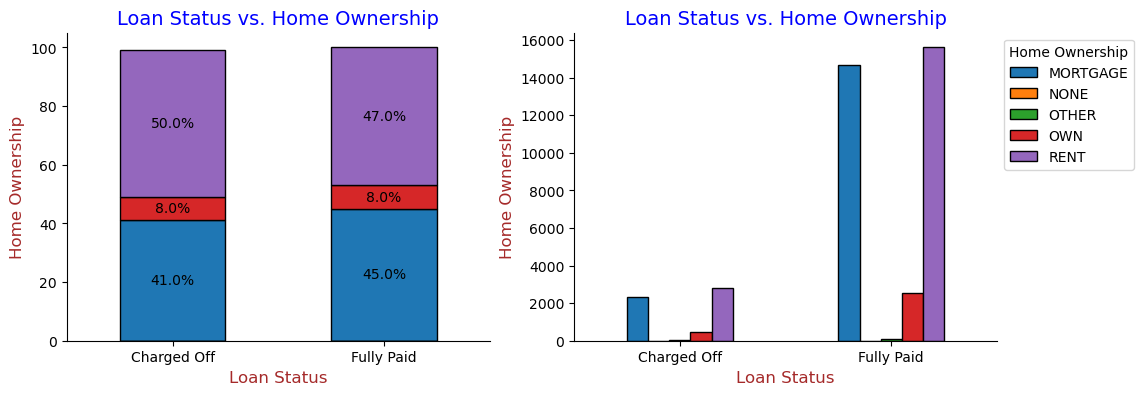

In [350]:
# Create graph between home_ownership and loan_status
bva_cat_tgt_vars(past_ln_df, ['home_ownership'], ['Home Ownership'], 'loan_status', 'Loan Status')

# Observations:
# Owning a home has only 3-4% better loan paying potential over renting. 
# This difference is insignificant for considering it as a valid loan default factor

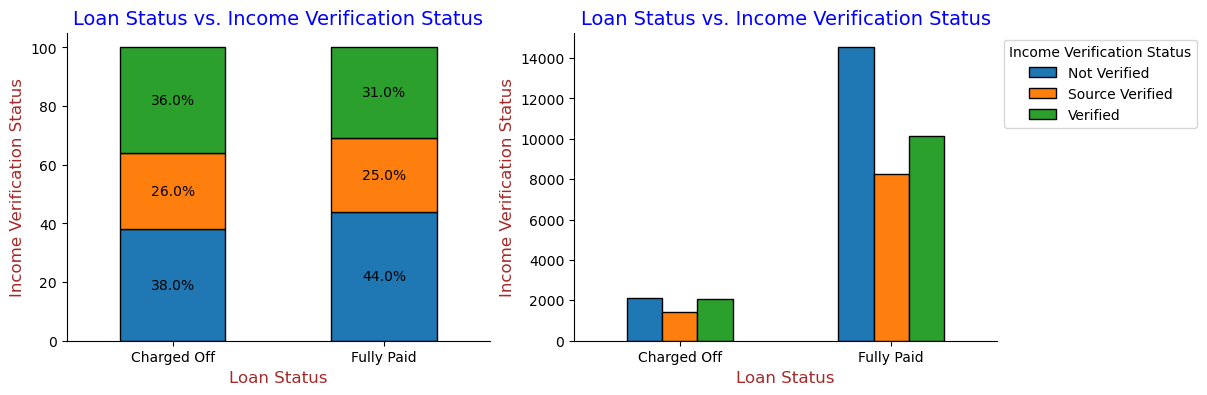

In [351]:
# Create graph between verification_status and loan_status
bva_cat_tgt_vars(past_ln_df, ['verification_status'], ['Income Verification Status'], 'loan_status', 'Loan Status')

# Observations:
# There is a 5-6% positive impact if the income is verified. This need not be considered as driving factor behind loan default

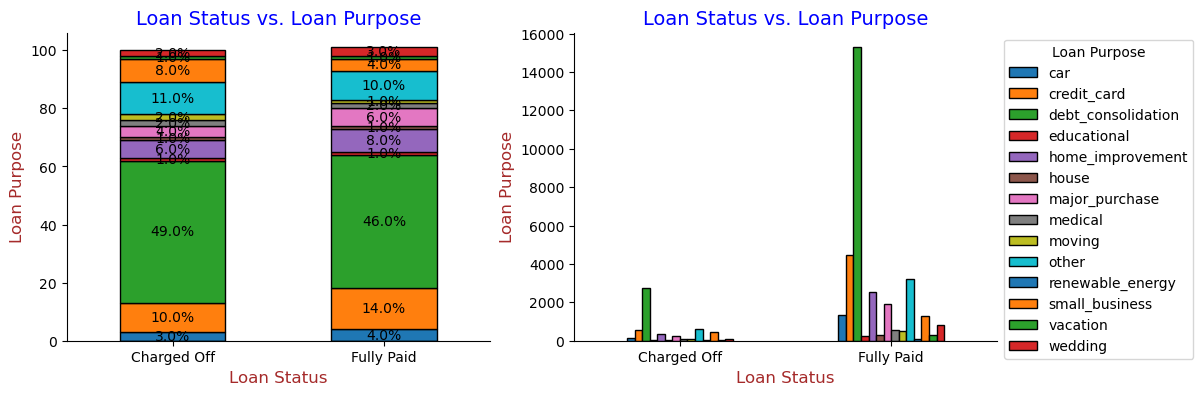

In [352]:
# Create graph between purpose and loan_status
bva_cat_tgt_vars(past_ln_df, ['purpose'], ['Loan Purpose'], 'loan_status', 'Loan Status')

# Observations:
# Loans taken for small business are defaulted at higher percentage point (twice of Fully Paid level). Hence this can be a driving factor

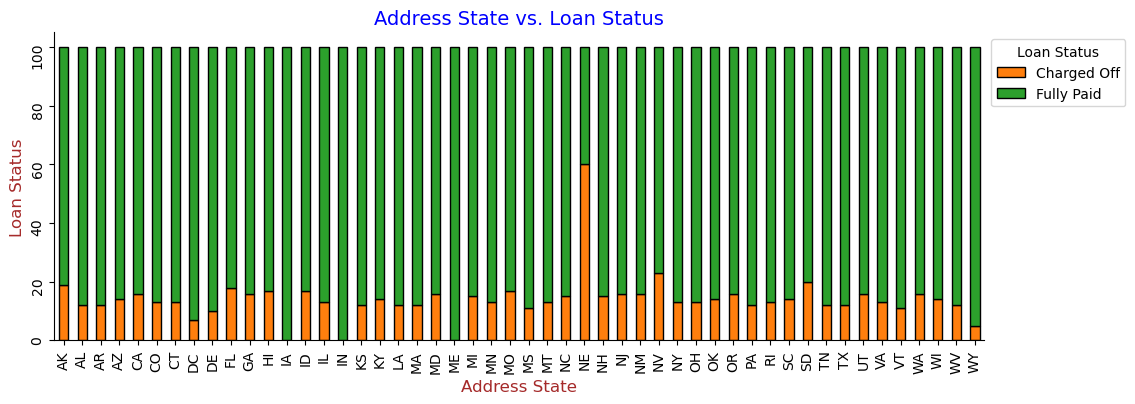

In [353]:
# Create graph between addr_state and loan_status

fig, ax = bva_sngl_cat_tgt_vars (past_ln_df, ['loan_status'], ['Loan Status'], 'addr_state', 'Address State')
ax.tick_params(labelrotation = 90)
fig.show()

# Observations:
# There is not significant variations in terms of loan default across states
# Nebraska (NE) has a high % default, but there are only 5 data points due to which a small number of default also is getting highlighted
# Hence State is not considered as driving factor

In [354]:
loan1_df[loan1_df['addr_state'] == 'NE'].groupby('addr_state')['loan_status'].value_counts()

addr_state  loan_status
NE          Charged Off    3
            Fully Paid     2
Name: count, dtype: int64

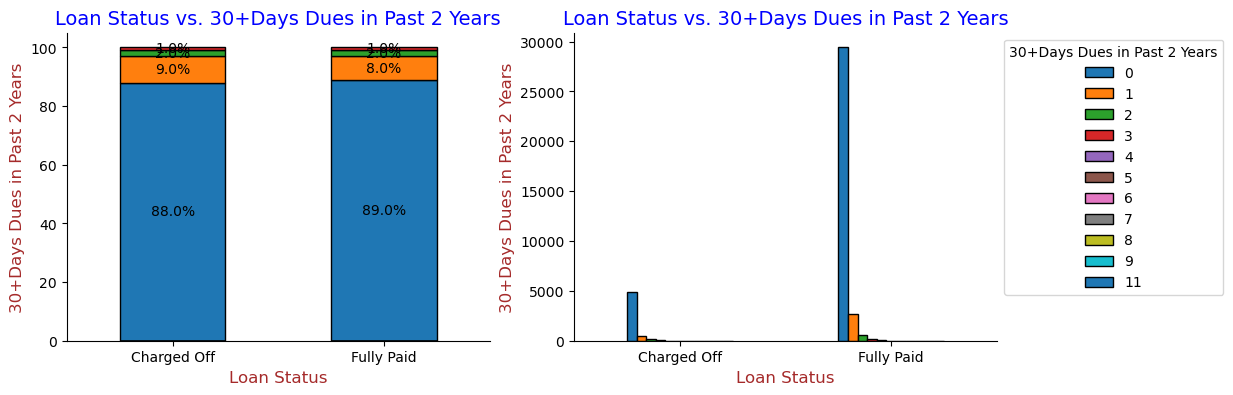

In [355]:
# Create graph between delinq_2yrs and loan_status
bva_cat_tgt_vars(past_ln_df, ['delinq_2yrs'], ['30+Days Dues in Past 2 Years'], 'loan_status', 'Loan Status')

# Observations:
# There is no significant variation in percentage points between Charged Off and Fully Paid loans. 
# Hence 30+Days Dues in Past 2 Years is not a driving factor

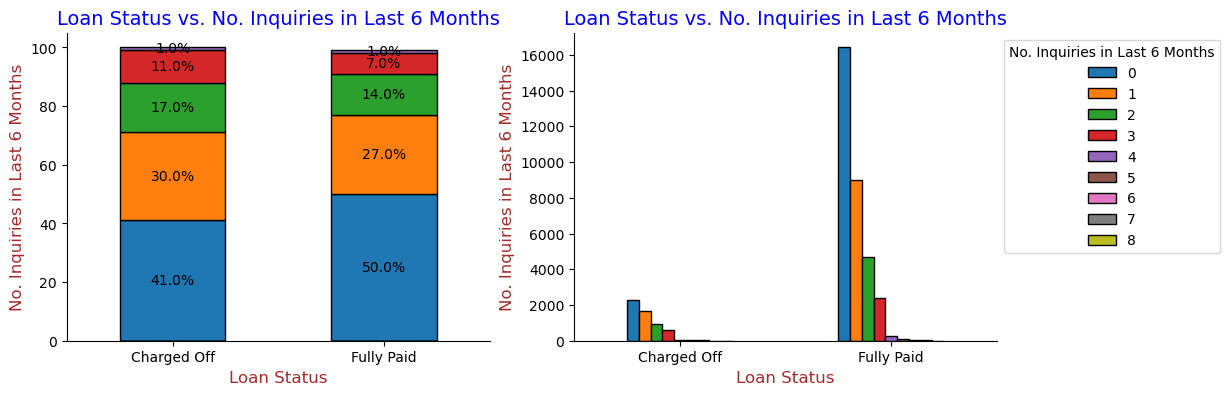

In [356]:
# Create graph between inq_last_6mths and loan_status
bva_cat_tgt_vars(past_ln_df, ['inq_last_6mths'], ['No. Inquiries in Last 6 Months'], 'loan_status', 'Loan Status')

# Observations:
# Charged Off borrowers have 9% more enquiries in last 6 months than Fully Paid borrowers
# Though the loan charge off may have been done more than 6 months ago, but it looks like defaulters are more active in seeking loans
# Hence this variable can be considered as driving factor for loan default

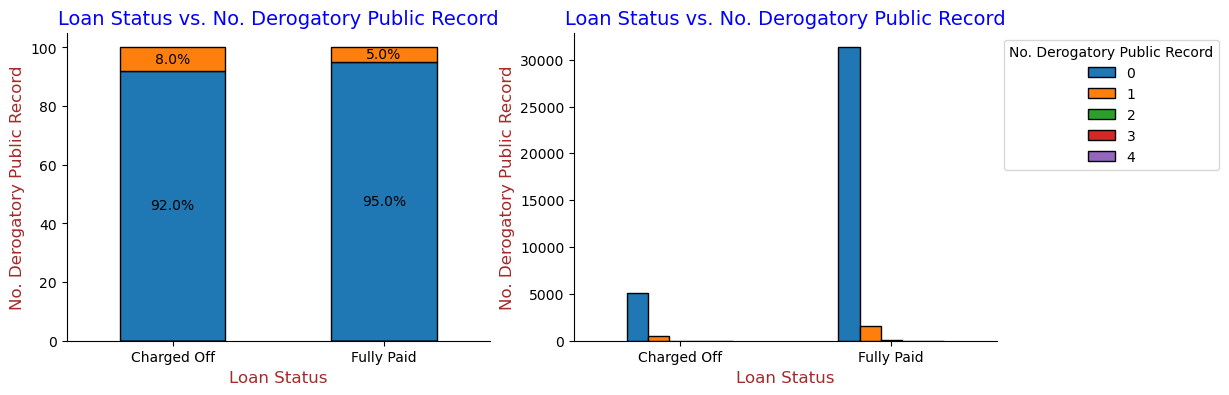

In [357]:
# Create graph between pub_rec and loan_status
bva_cat_tgt_vars(past_ln_df, ['pub_rec'], ['No. Derogatory Public Record'], 'loan_status', 'Loan Status')

# Observations:
# There is no significant variation in defaulting loan with number of derogatory public records. Hence this is not a driving factor

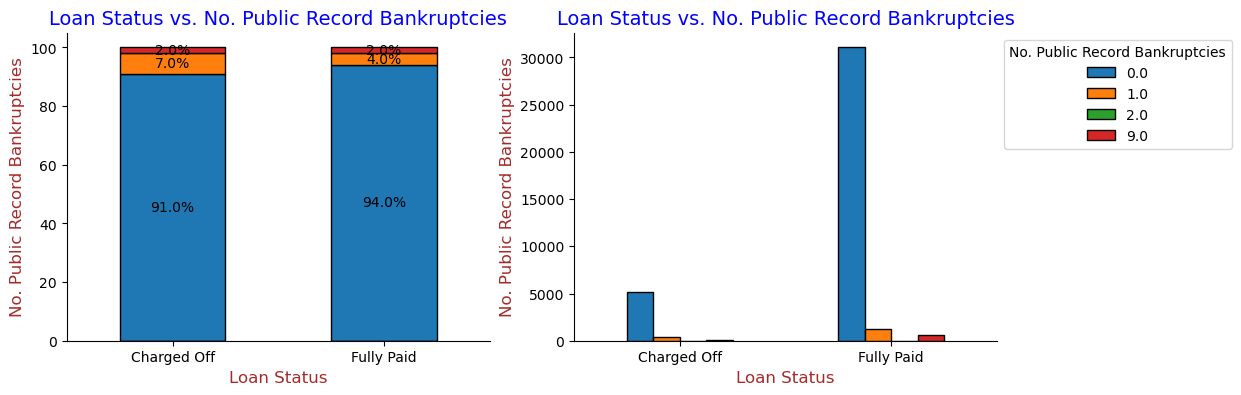

In [358]:
# Create graph between pub_rec_bankruptcies and loan_status
# Number 9 indicates missing values for this variable in data set

bva_cat_tgt_vars(past_ln_df, ['pub_rec_bankruptcies'], ['No. Public Record Bankruptcies'], 'loan_status', 'Loan Status')

# Observations:
# There is no significant variation in defaulting loan with number of Public Record Bankruptcies. Hence this is not a driving factor

##### D.2.4. Visualize Relationship between Loan Status and Derived Variables

In [359]:
# For Earliest Credit Line Open Months w.r.t. Loan Issue Date, convert it to Age of Earliest Credit and redo the graph
import datetime as dt

# Convert issue_d to date object and store in temp_date column
loan1_df['temp_date'] = pd.to_datetime(loan1_df['issue_d'], format='%b-%y') 

# Convert earliest_cr_line to date object and store in credit_date column
loan1_df['credit_date'] = pd.to_datetime(loan1_df['earliest_cr_line'], format='%b-%y')

# Resolve the Python date issue whereby Python treats dates before year '69' as 2069 by subtracting 100 years from date value
loan1_df["credit_date"] = loan1_df["credit_date"].apply(lambda x: x - dt.timedelta(days=365*100) if x > dt.datetime.now() else x)

# Compute the interval months between the two dates and store in col 'cr_line_age'
loan1_df['cr_line_age'] = loan1_df['temp_date'] - loan1_df['credit_date']
loan1_df['cr_line_age'] = round(loan1_df['cr_line_age'].dt.days/30, 0)

# Now drop the temporary columns
loan1_df.drop('temp_date', axis=1, inplace=True)
loan1_df.drop('credit_date', axis=1, inplace=True)

In [360]:
loan1_df[['earliest_cr_line', 'issue_d', 'cr_line_age']].head()

,earliest_cr_line,issue_d,cr_line_age
0,Jan-85,Dec-11,328.0
1,Apr-99,Dec-11,154.0
2,Nov-01,Dec-11,123.0
3,Feb-96,Dec-11,193.0
4,Jan-96,Dec-11,194.0


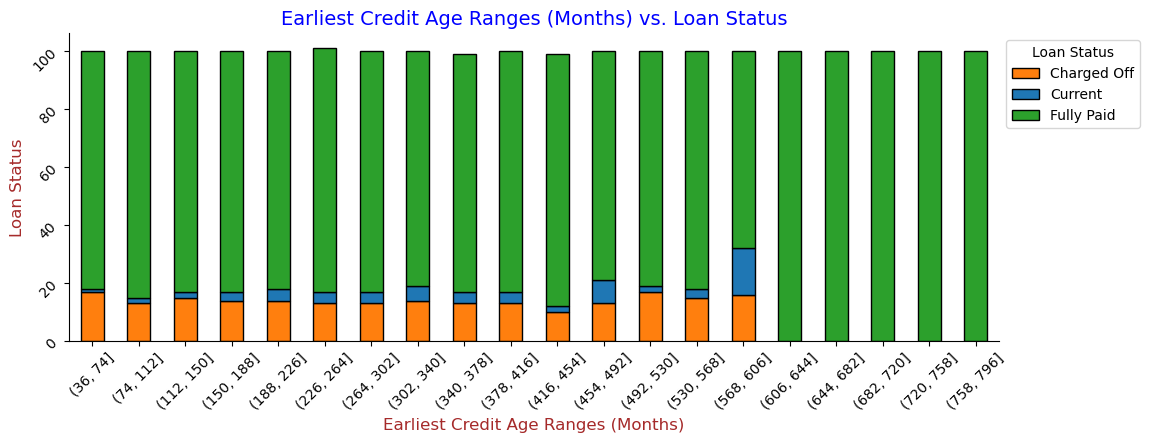

In [361]:
# Draw the cr_line_age chart differently by diving cr_line_age into 20 bins
# The Current loans are not removed for this analysis to understand if there are significant loans open in older ranges

loan1_df = create_bins(loan1_df, 'cr_line_age', 'cr_age_range', 20)

# Draw the graph
fig, ax = bva_sngl_cat_tgt_vars (loan1_df, ['loan_status'], ['Loan Status'], 'cr_age_range', 'Earliest Credit Age Ranges (Months)')
ax.tick_params(labelrotation = 45)
fig.show()

# Observations:
# Though it appears that there are no defauls in Credit Line Age of over 568 months, 
# but there are only 25 data points in that group. Hence we can't consider this variable as a driving factor.

In [362]:
# Check if the number of data points for older (> 568 months) credit line age ranges are significant
loan1_df.cr_age_range.value_counts()

# Observations:
# There are only 25 data points for earliest credit line age of over 568 months

cr_age_range
(112, 150]    9242
(150, 188]    7421
(74, 112]     5955
(188, 226]    5096
(36, 74]      4102
(226, 264]    2990
(264, 302]    2027
(302, 340]    1179
(340, 378]     652
(378, 416]     446
(416, 454]     247
(454, 492]     152
(492, 530]      95
(530, 568]      33
(568, 606]      19
(644, 682]       2
(606, 644]       1
(682, 720]       1
(720, 758]       1
(758, 796]       1
Name: count, dtype: int64

In [363]:
# Add a derived variable called 'pct_open_crline' and analyse its impact on loan_status

past_ln_df['pct_open_crline'] = round(past_ln_df['open_acc']/past_ln_df['total_acc']*100, 1)
past_ln_df[['open_acc','total_acc', 'pct_open_crline']].head()

,open_acc,total_acc,pct_open_crline
0,3,9,33.3
1,3,4,75.0
2,2,10,20.0
3,10,37,27.0
5,9,12,75.0


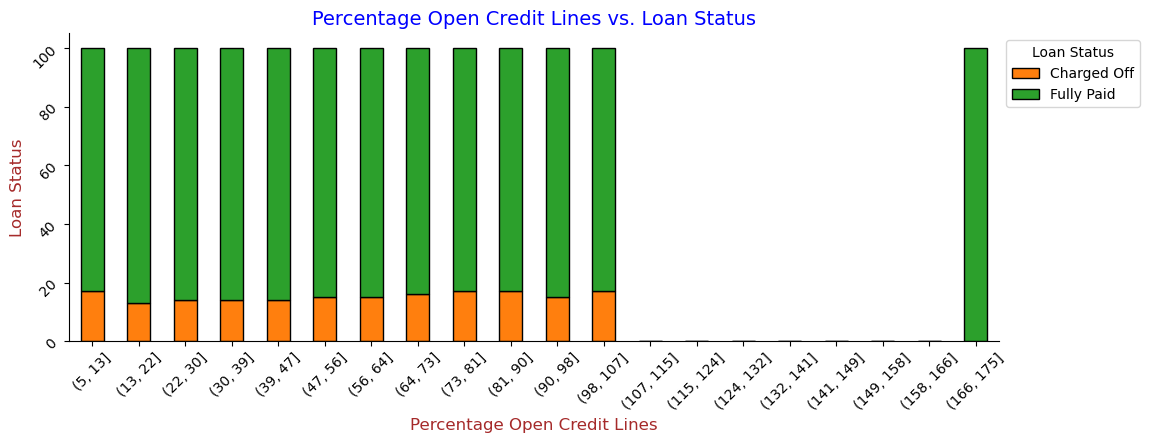

In [364]:
# Draw the pct_open_crline chart by diving pct_open_crline into 20 bins

past_ln_df = create_bins(past_ln_df, 'pct_open_crline', 'pct_open_crline_rngs', 20)

# Draw the graph
fig, ax = bva_sngl_cat_tgt_vars (past_ln_df, ['loan_status'], ['Loan Status'], 'pct_open_crline_rngs', 'Percentage Open Credit Lines')
ax.tick_params(labelrotation = 45)
fig.show()

# Observations:
# There is no significant variation with percentage open credit lines. Hence this variable is not a driving factor

#### D.3. Perform Multi-variate Analysis

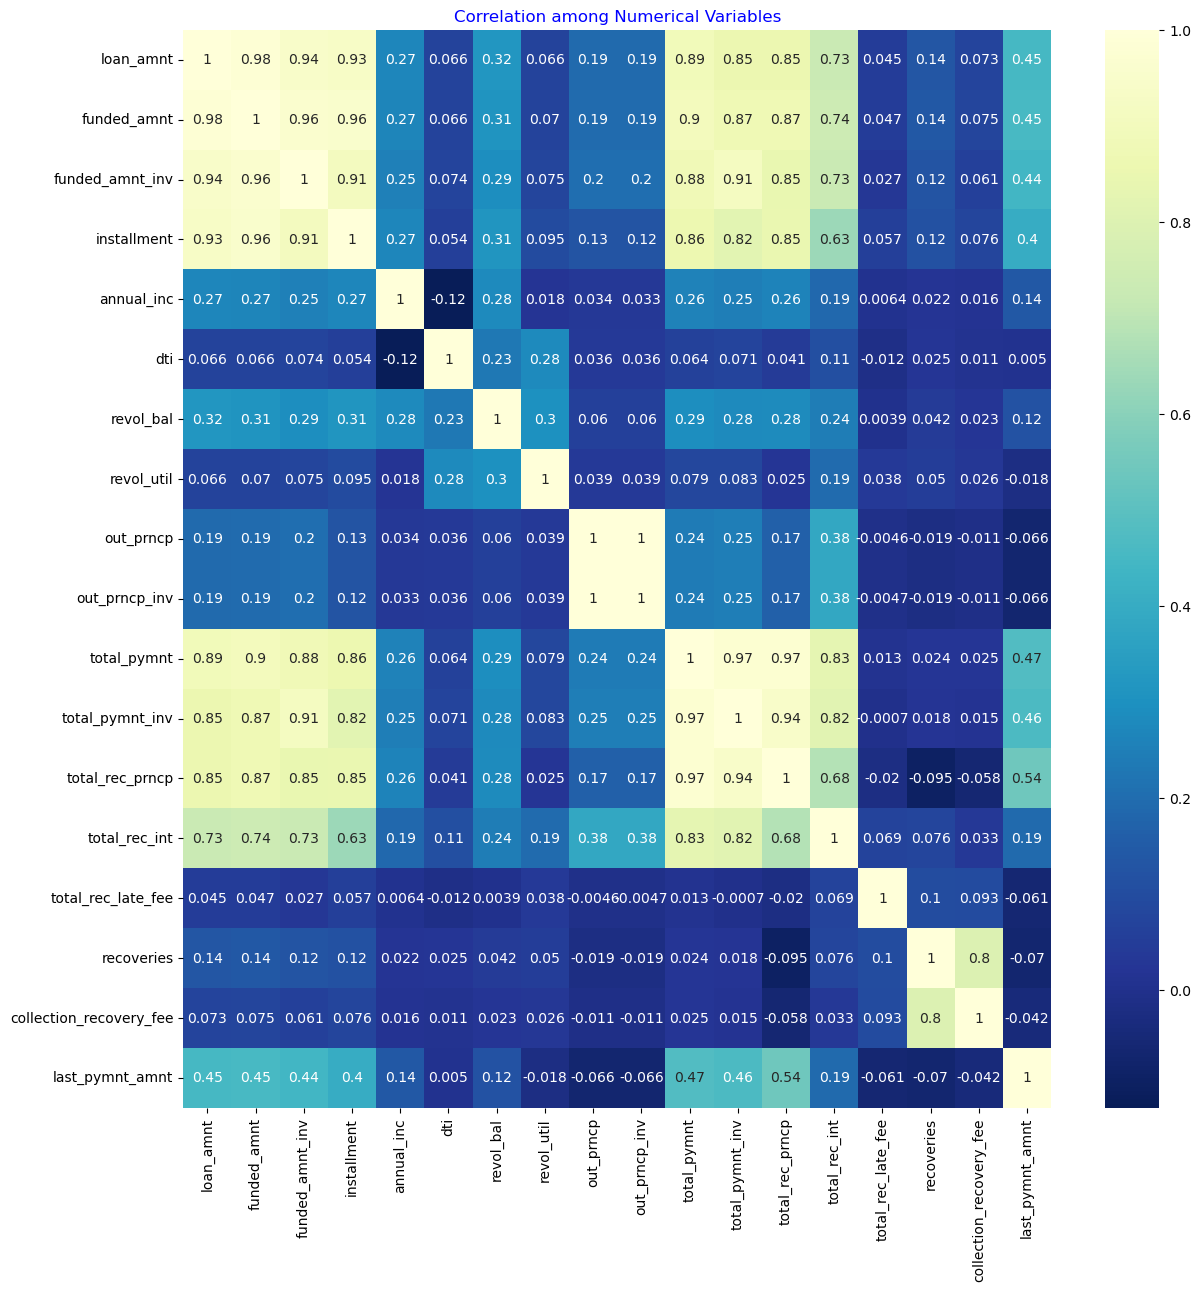

In [365]:
# HeatMap (Numerical Variables)
plt.figure(figsize=(14, 14))
sns.heatmap(loan1_df[num_vars].corr(),annot=True,cmap="YlGnBu_r")
plt.title("Correlation among Numerical Variables", color='blue')
plt.show()

In [366]:
# Observations from multivariate analysis using heatmap among all numerical variables

# 1. There is a strong correlation among Loan Amount Applied, Funded Amount and Installments. 
    # This is obvious because funded amount and installment would be higher when loan is applied for higher amount

# 2. There is strong correlation among Total Payment Received (total_pymnt), Total Payment Received for Investor Funds (total_pymnt_inv),
    # Principal Received to Date (total_rec_prncp), Interest Received to Date (total_rec_int)
    # This is also expected as when funding is higher, the principal and interest received would be higher too

# 3. Recoveries has strong correlation with Post Charge-off Collection Fee (collection_recovery_fee)
    # This is expected as the collection fees would go up as more recoveries take place

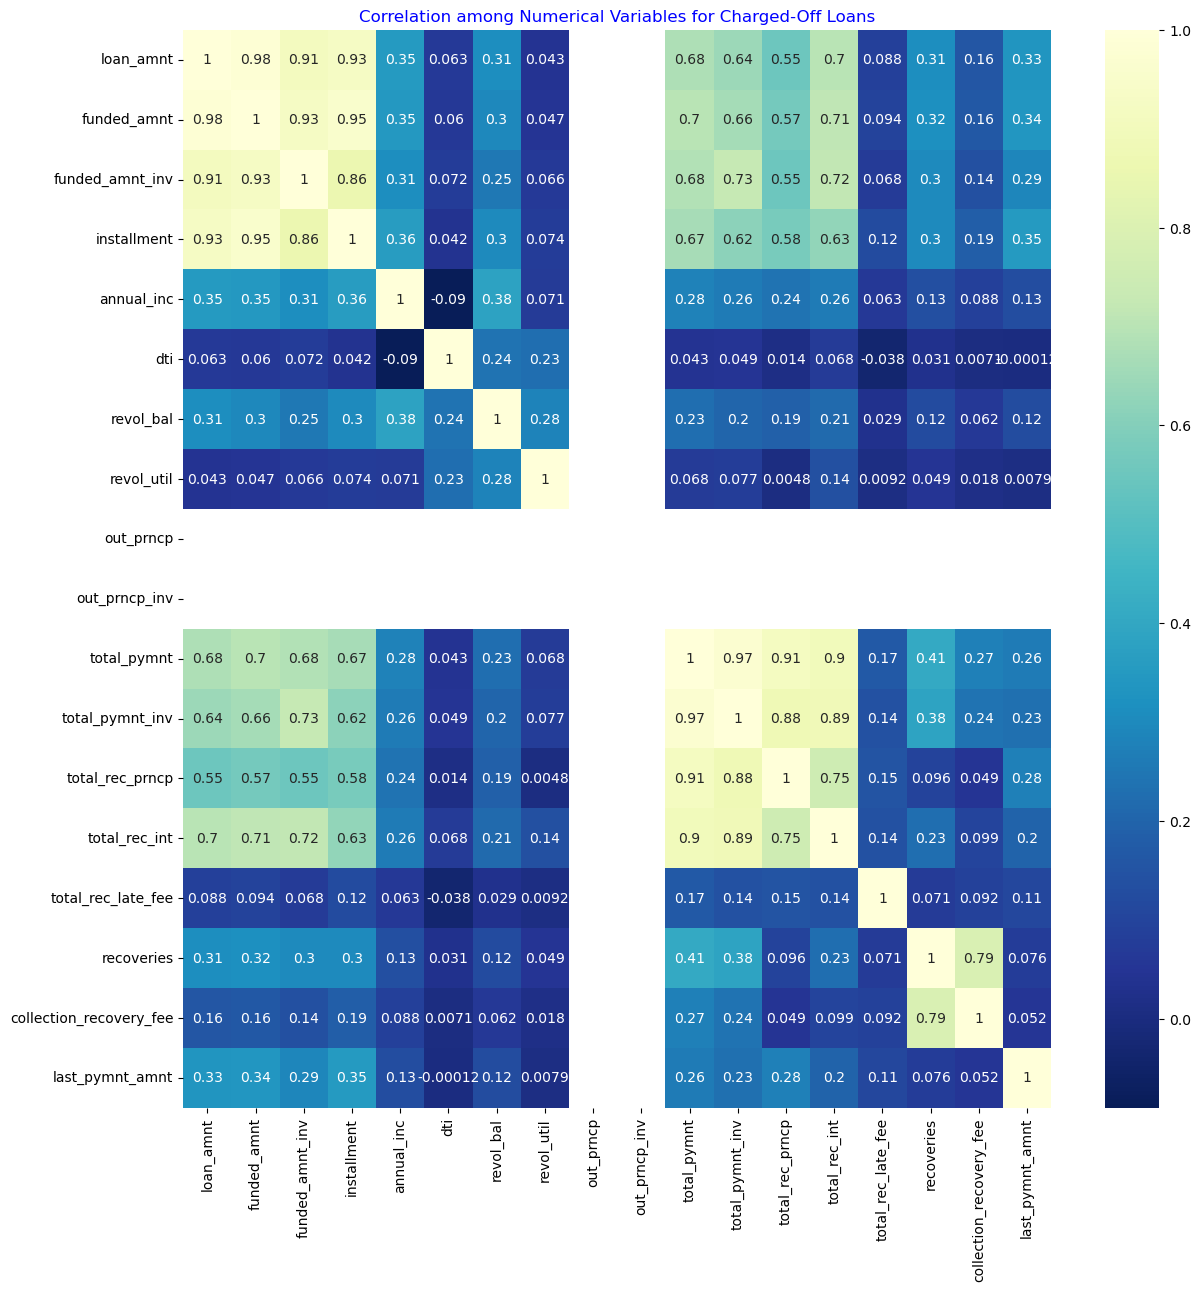

In [367]:
# Create the HeatMap (Numerical Variables) when loan_status is "Charged Off"

plt.figure(figsize=(14, 14))
sns.heatmap(loan1_df[num_vars][loan1_df.loan_status == 'Charged Off'].corr(),annot=True,cmap="YlGnBu_r")
plt.title("Correlation among Numerical Variables for Charged-Off Loans", color='blue')
plt.show()

In [368]:
# No additional observations noted from above heatmap